##import libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## read data

In [148]:
df=pd.read_csv(r"/content/employee_promotion_dataset_filled.csv")

In [149]:
df.head()

age   salary  experience_years  working_hours_per_week  performance_score  \
0  56.0   7250.0              16.0                    46.0               4.11   
1  46.0  18372.0               9.0                    41.0               2.60   
2  32.0  20279.0              11.0                    37.0               3.66   
3  60.0  33193.0              18.0                    24.0               2.58   
4   NaN  29868.0              39.0                     NaN               3.29   

   projects_completed  overtime_hours  distance_from_home_km  training_hours  \
0                15.0             7.0                   29.1           160.0   
1                29.0            19.0                    NaN            58.0   
2                33.0            21.0                   26.0            67.0   
3                 4.0            27.0                   18.8            48.0   
4                 NaN             NaN                    4.4            14.0   

   absent_days  ... education_level        job_role  department        city  \
0         15.0  ...          Master  Data Scientist     Finance       Tanta   
1          9.0  ...        Bachelor             NaN  Operations       Tanta   
2         28.0  ...          Master  Data Scientist  Operations    Mansoura   
3         13.0  ...     High School              HR  Operations  Alexandria   
4         13.0  ...             PhD              HR  Operations    Mansoura   

  company_type work_mode marital_status has_certifications  promotion  \
0      Startup    Onsite        Married                0.0          0   
1          SME    Remote        Married                0.0          0   
2          SME    Onsite        Married                0.0          0   
3   Enterprise    Remote         Single                1.0          0   
4      Startup    Hybrid        Married                1.0          0   

   job_satisfaction  
0               NaN  
1            Medium  
2              High  
3            Medium  
4               Low  

[5 rows x 21 columns]

## show info of data

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     13822 non-null  float64
 1   salary                  13747 non-null  float64
 2   experience_years        13824 non-null  float64
 3   working_hours_per_week  13795 non-null  float64
 4   performance_score       13817 non-null  float64
 5   projects_completed      13769 non-null  float64
 6   overtime_hours          13804 non-null  float64
 7   distance_from_home_km   13770 non-null  float64
 8   training_hours          13758 non-null  float64
 9   absent_days             13772 non-null  float64
 10  gender                  13816 non-null  object 
 11  education_level         13820 non-null  object 
 12  job_role                13772 non-null  object 
 13  department              13811 non-null  object 
 14  city                    13817 non-null

In [151]:
df.shape

(15000, 21)

In [152]:
df.dropna(how='all',inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     13822 non-null  float64
 1   salary                  13747 non-null  float64
 2   experience_years        13824 non-null  float64
 3   working_hours_per_week  13795 non-null  float64
 4   performance_score       13817 non-null  float64
 5   projects_completed      13769 non-null  float64
 6   overtime_hours          13804 non-null  float64
 7   distance_from_home_km   13770 non-null  float64
 8   training_hours          13758 non-null  float64
 9   absent_days             13772 non-null  float64
 10  gender                  13816 non-null  object 
 11  education_level         13820 non-null  object 
 12  job_role                13772 non-null  object 
 13  department              13811 non-null  object 
 14  city                    13817 non-null

In [154]:
df.shape

(15000, 21)

In [155]:
df.isnull().sum().sort_values(ascending=False)

salary                    1253
training_hours            1242
projects_completed        1231
distance_from_home_km     1230
absent_days               1228
job_role                  1228
marital_status            1210
work_mode                 1208
working_hours_per_week    1205
job_satisfaction          1196
overtime_hours            1196
company_type              1195
department                1189
gender                    1184
city                      1183
performance_score         1183
education_level           1180
age                       1178
experience_years          1176
has_certifications        1155
promotion                    0
dtype: int64

In [156]:
df.select_dtypes(include='number').columns

Index(['age', 'salary', 'experience_years', 'working_hours_per_week',
       'performance_score', 'projects_completed', 'overtime_hours',
       'distance_from_home_km', 'training_hours', 'absent_days',
       'has_certifications', 'promotion'],
      dtype='object')

In [157]:
cont_cols = [
    'experience_years',
    'working_hours_per_week',
    'performance_score',
    'distance_from_home_km',
    'training_hours',
    'overtime_hours',
    'salary',
    'age'
]


## missing value

In [158]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

iter_imputer = IterativeImputer(
    estimator=DecisionTreeRegressor(),
    max_iter=20,
    random_state=42
)

df[cont_cols] = iter_imputer.fit_transform(df[cont_cols])

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [159]:


df.isnull().sum().sort_values(ascending=False)

projects_completed        1231
absent_days               1228
job_role                  1228
marital_status            1210
work_mode                 1208
job_satisfaction          1196
company_type              1195
department                1189
gender                    1184
city                      1183
education_level           1180
has_certifications        1155
age                          0
performance_score            0
working_hours_per_week       0
experience_years             0
salary                       0
distance_from_home_km        0
overtime_hours               0
training_hours               0
promotion                    0
dtype: int64

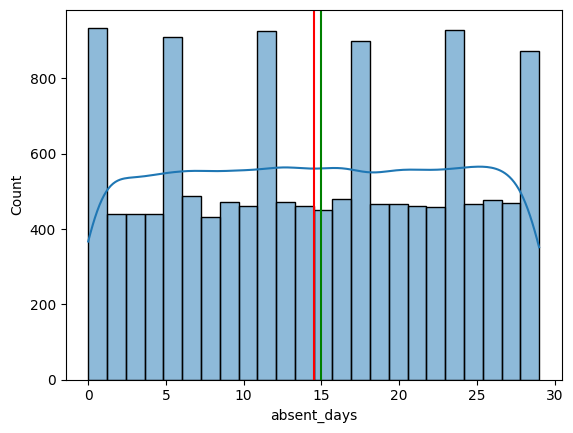

In [160]:
sns.histplot(data=df,x='absent_days',kde=True)
plt.axvline(df.absent_days.mean(),color='r')
plt.axvline(df.absent_days.median(),color='g')

In [161]:


fig = px.histogram(df,x="promotion",color="promotion",title="Promotion Class Distribution",
    text_auto=True
)
fig.show()


In [162]:
fig = px.violin( df, x="promotion", y="salary", box=True,
    points="all",
    title="Salary Distribution by Promotion"
)
fig.show()


In [163]:

df.select_dtypes(include='object').columns

Index(['gender', 'education_level', 'job_role', 'department', 'city',
       'company_type', 'work_mode', 'marital_status', 'job_satisfaction'],
      dtype='object')

In [164]:
median=['projects_completed','absent_days']
mode=['gender', 'education_level', 'job_role', 'department', 'city',
       'company_type', 'work_mode', 'marital_status', 'job_satisfaction']

## impute missing value

In [165]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')
for col in median:
  df[col]=impute.fit_transform(df[[col]])

In [166]:
df.isnull().sum()

age                          0
salary                       0
experience_years             0
working_hours_per_week       0
performance_score            0
projects_completed           0
overtime_hours               0
distance_from_home_km        0
training_hours               0
absent_days                  0
gender                    1184
education_level           1180
job_role                  1228
department                1189
city                      1183
company_type              1195
work_mode                 1208
marital_status            1210
has_certifications        1155
promotion                    0
job_satisfaction          1196
dtype: int64

In [167]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
for col in mode:
  df[[col]]=impute.fit_transform(df[[col]])

In [168]:
df.isnull().sum()

age                          0
salary                       0
experience_years             0
working_hours_per_week       0
performance_score            0
projects_completed           0
overtime_hours               0
distance_from_home_km        0
training_hours               0
absent_days                  0
gender                       0
education_level              0
job_role                     0
department                   0
city                         0
company_type                 0
work_mode                    0
marital_status               0
has_certifications        1155
promotion                    0
job_satisfaction             0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     15000 non-null  float64
 1   salary                  15000 non-null  float64
 2   experience_years        15000 non-null  float64
 3   working_hours_per_week  15000 non-null  float64
 4   performance_score       15000 non-null  float64
 5   projects_completed      15000 non-null  float64
 6   overtime_hours          15000 non-null  float64
 7   distance_from_home_km   15000 non-null  float64
 8   training_hours          15000 non-null  float64
 9   absent_days             15000 non-null  float64
 10  gender                  15000 non-null  object 
 11  education_level         15000 non-null  object 
 12  job_role                15000 non-null  object 
 13  department              15000 non-null  object 
 14  city                    15000 non-null

In [170]:
df.head(20)

age   salary  experience_years  working_hours_per_week  \
0   56.0   7250.0              16.0                    46.0   
1   46.0  18372.0               9.0                    41.0   
2   32.0  20279.0              11.0                    37.0   
3   60.0  33193.0              18.0                    24.0   
4   30.0  29868.0              39.0                    53.0   
5   38.0  31475.0              22.0                    32.0   
6   56.0   5433.0              39.0                    26.0   
7   36.0  13998.0               9.0                    45.0   
8   40.0  34133.0               9.0                    58.0   
9   28.0  37069.0               9.0                    34.0   
10  28.0   9858.0               3.0                    52.0   
11  41.0  11950.0              29.0                    22.0   
12  53.0  11938.0               3.0                    21.0   
13  57.0  28168.0               0.0                    36.0   
14  41.0  35099.0              19.0                    20.0   
15  20.0   8644.0               4.0                    48.0   
16  39.0  12260.0              29.0                    36.0   
17  19.0  39075.0              25.0                    21.0   
18  41.0  19488.0              39.0                    52.0   
19  61.0   3395.0              33.0                    57.0   

    performance_score  projects_completed  overtime_hours  \
0                4.11                15.0             7.0   
1                2.60                29.0            19.0   
2                3.66                33.0            21.0   
3                2.58                 4.0            27.0   
4                3.29                25.0            25.0   
5                4.96                32.0            23.0   
6                3.14                 4.0             3.0   
7                4.95                39.0             0.0   
8                3.99                41.0             1.0   
9                1.48                 2.0             3.0   
10               4.18                37.0             8.0   
11               1.65                12.0            26.0   
12               3.13                 7.0            20.0   
13               3.45                29.0            12.0   
14               2.60                25.0            28.0   
15               1.84                 4.0             4.0   
16               4.50                37.0            10.0   
17               4.74                30.0            10.0   
18               1.36                 1.0            17.0   
19               4.54                 6.0            14.0   

    distance_from_home_km  training_hours  absent_days  ... education_level  \
0                    29.1           160.0         15.0  ...          Master   
1                    47.3            58.0          9.0  ...        Bachelor   
2                    26.0            67.0         28.0  ...          Master   
3                    18.8            48.0         13.0  ...     High School   
4                     4.4            14.0         13.0  ...             PhD   
5                     2.1           130.0         23.0  ...          Master   
6                    23.5           194.0         13.0  ...             PhD   
7                    10.9           144.0         12.0  ...        Bachelor   
8                    47.0           138.0          1.0  ...          Master   
9                    32.4            74.0         19.0  ...     High School   
10                   29.7           182.0         22.0  ...        Bachelor   
11                   20.9             7.0          1.0  ...             PhD   
12                   17.1            36.0         17.0  ...        Bachelor   
13                    9.8           169.0         15.0  ...        Bachelor   
14                    3.9            19.0         25.0  ...     High School   
15                   32.1           114.0          3.0  ...     High School   
16                   39.2            21.0         24.0  

In [171]:
bin_cols=['has_certifications']

In [172]:

from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=15)
df[bin_cols] = impute.fit_transform(df[bin_cols])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     15000 non-null  float64
 1   salary                  15000 non-null  float64
 2   experience_years        15000 non-null  float64
 3   working_hours_per_week  15000 non-null  float64
 4   performance_score       15000 non-null  float64
 5   projects_completed      15000 non-null  float64
 6   overtime_hours          15000 non-null  float64
 7   distance_from_home_km   15000 non-null  float64
 8   training_hours          15000 non-null  float64
 9   absent_days             15000 non-null  float64
 10  gender                  15000 non-null  object 
 11  education_level         15000 non-null  object 
 12  job_role                15000 non-null  object 
 13  department              15000 non-null  object 
 14  city                    15000 non-null

In [174]:
df.isnull().sum().sum()

np.int64(0)

In [175]:
df.duplicated().sum()

np.int64(0)

In [176]:
corr=df.corr(numeric_only=True)

<Axes: >

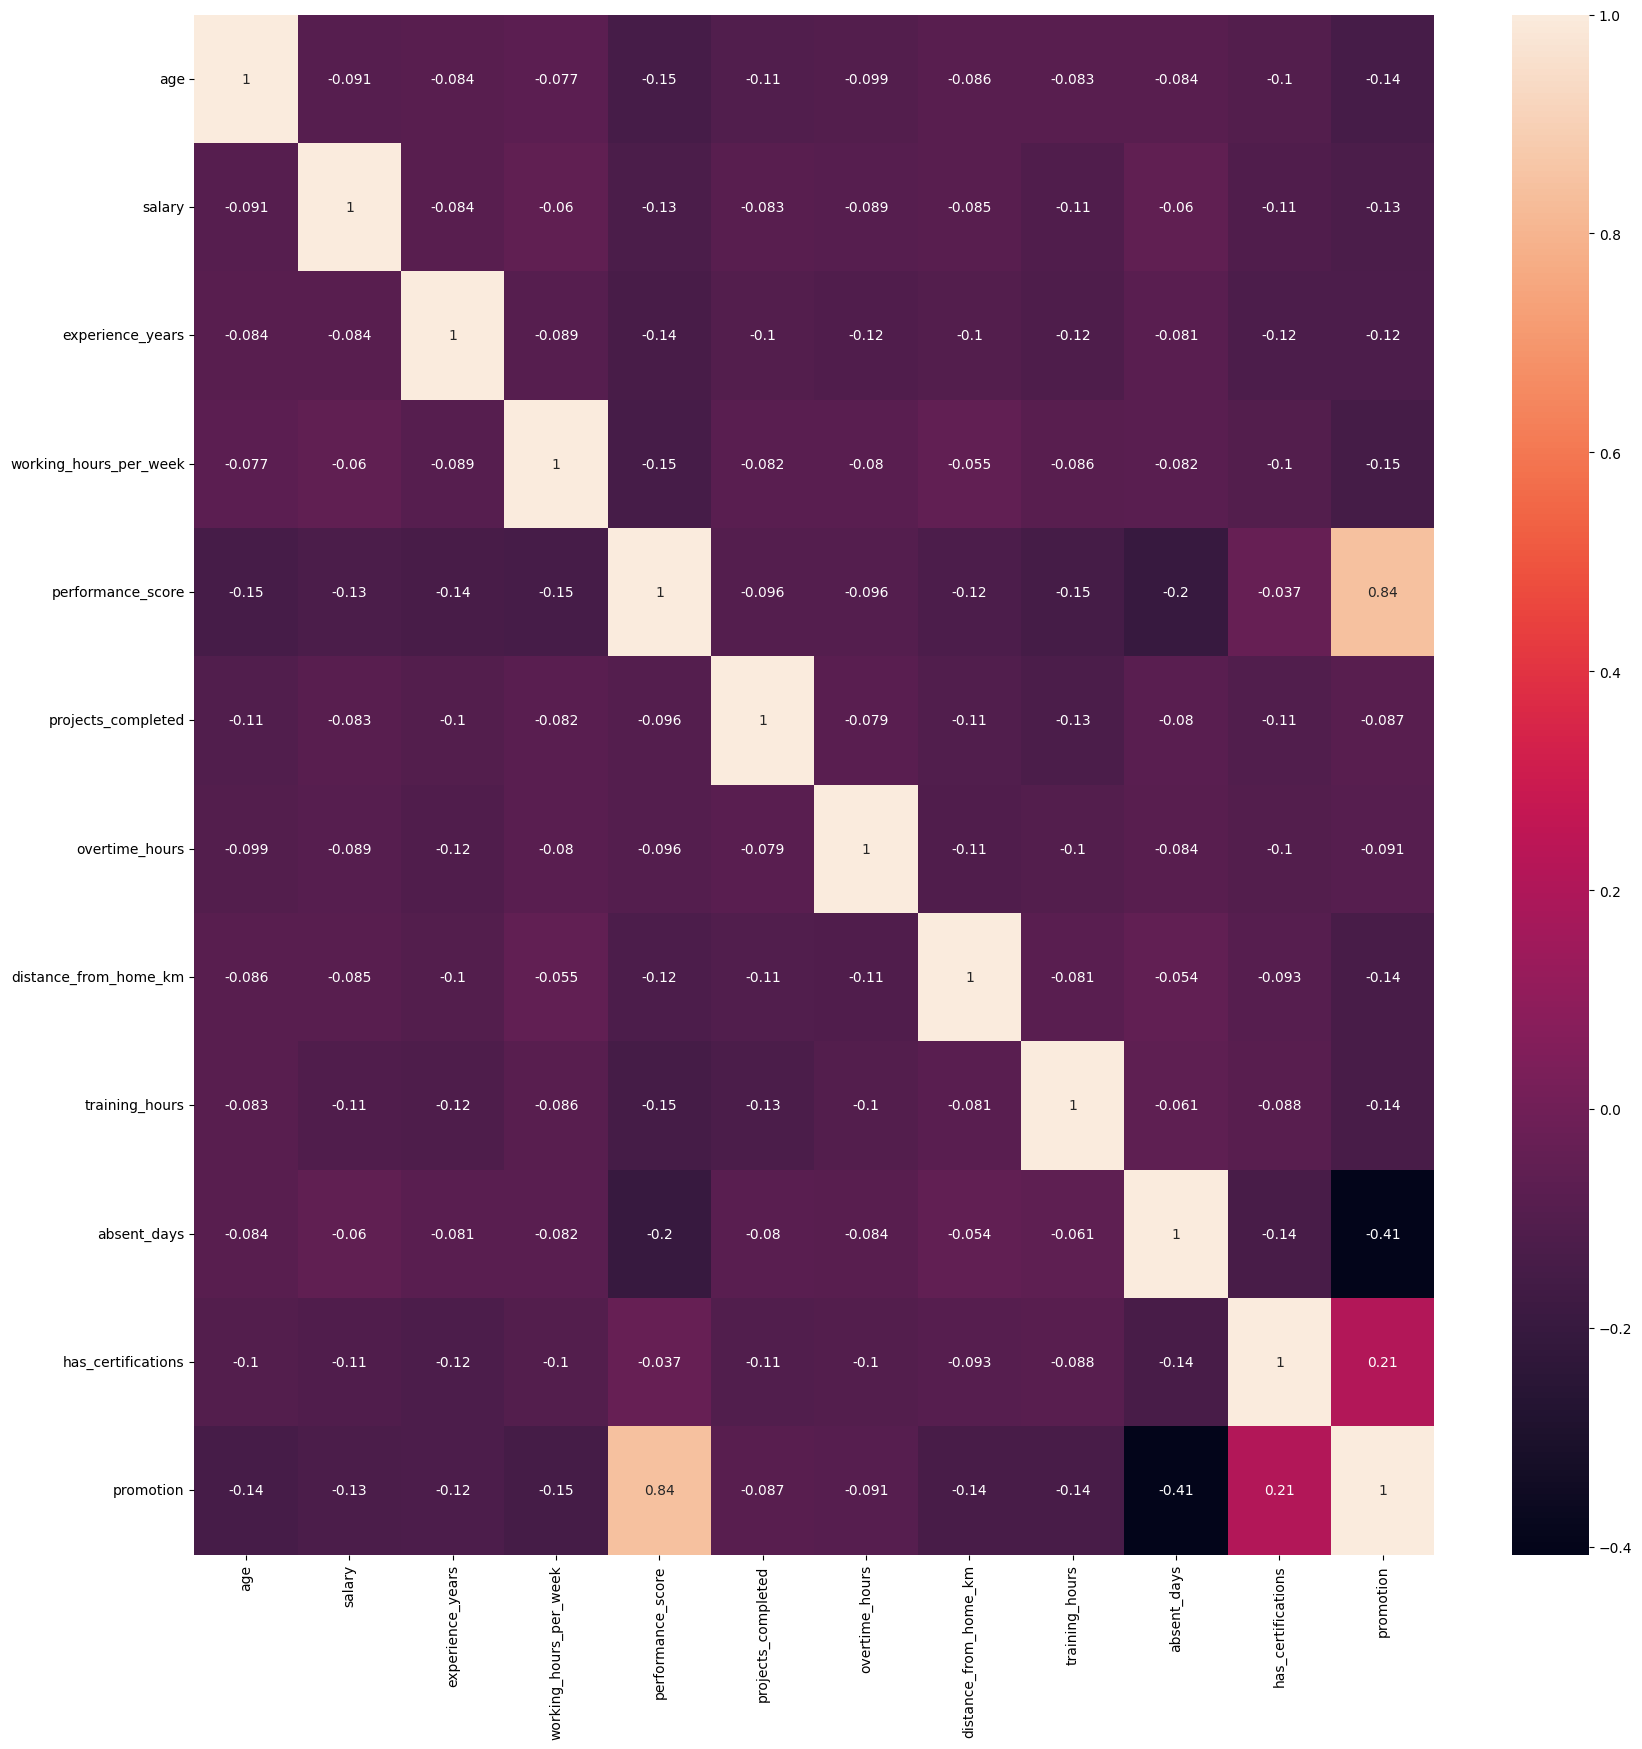

In [177]:
plt.figure(figsize=(20,20))
sns.heatmap(corr.corr(),annot=True)

In [178]:
df.describe()

age        salary  experience_years  working_hours_per_week  \
count  15000.000000  15000.000000      15000.000000            15000.000000   
mean      41.037467  21396.869667         19.525200               39.494600   
std       13.488387  10567.053783         11.589532               11.589397   
min       18.000000   3002.000000          0.000000               20.000000   
25%       30.000000  12332.750000          9.000000               29.000000   
50%       41.000000  21324.500000         20.000000               40.000000   
75%       53.000000  30428.250000         29.000000               49.000000   
max       64.000000  39994.000000         39.000000               59.000000   

       performance_score  projects_completed  overtime_hours  \
count       15000.000000        15000.000000    15000.000000   
mean            2.998915           24.651133       14.561867   
std             1.150741           13.836302        8.714480   
min             1.000000            0.000000        0.000000   
25%             2.020000           13.000000        7.000000   
50%             3.000000           25.000000       15.000000   
75%             3.990000           36.000000       22.000000   
max             5.000000           49.000000       29.000000   

       distance_from_home_km  training_hours   absent_days  \
count           15000.000000    15000.000000  15000.000000   
mean               25.476307      100.018867     14.557067   
std                14.294516       57.509465      8.269436   
min                 1.000000        0.000000      0.000000   
25%                12.900000       51.000000      8.000000   
50%                25.600000      100.000000     15.000000   
75%                38.000000      150.000000     21.000000   
max                50.000000      199.000000     29.000000   

       has_certifications    promotion  
count        15000.000000  15000.00000  
mean             0.492452      0.21240  
std              0.480326      0.40902  
min              0.000000      0.00000  
25%              0.000000      0.00000  
50%              0.492452      0.00000  
75%              1.000000      0.00000  
max              1.000000      1.00000

In [179]:
px.box(data_frame=df,x='salary')

<Axes: xlabel='salary', ylabel='Count'>

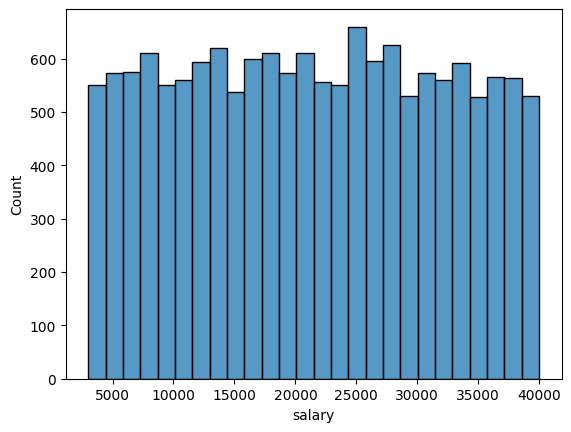

In [180]:
sns.histplot(data=df,x='salary')

## visualization

## promotion by score

Text(0.5, 1.0, 'Performance Score vs Promotion')

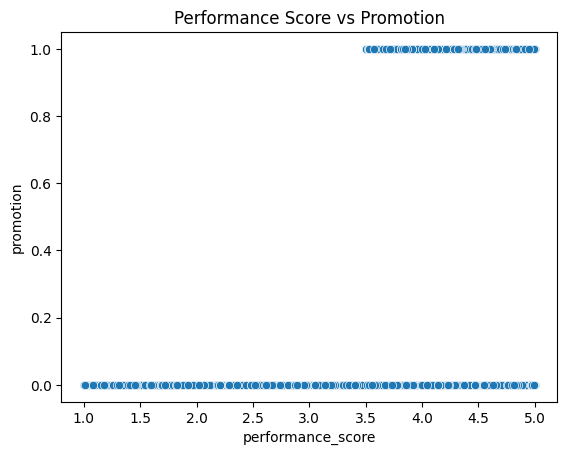

In [181]:

plt.figure()
sns.scatterplot( data=df,x='performance_score',y='promotion'
)
plt.title('Performance Score vs Promotion')



## relationship promotin by experiance

Text(0.5, 1.0, 'Experience Years vs Promotion')

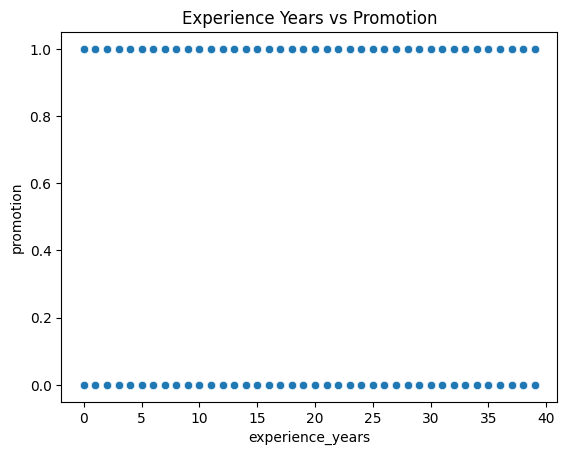

In [182]:
sns.scatterplot(data=df,x='experience_years',y='promotion')
plt.title('Experience Years vs Promotion')


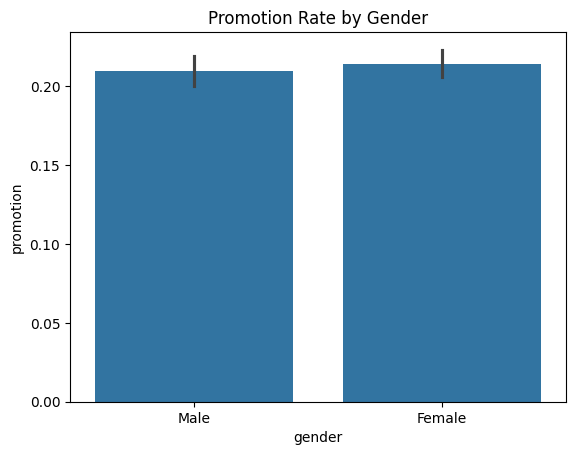

In [183]:
sns.barplot( data=df,x='gender', y='promotion')
plt.title('Promotion Rate by Gender')
plt.show()


Text(0.5, 1.0, 'Promotion Rate by Education Level')

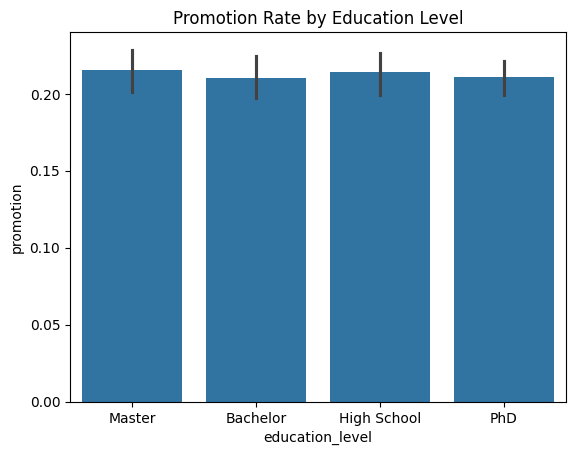

In [184]:
sns.barplot( data=df, x='education_level', y='promotion')
plt.title('Promotion Rate by Education Level')


Text(0.5, 1.0, 'Promotion Rate by Job Role')

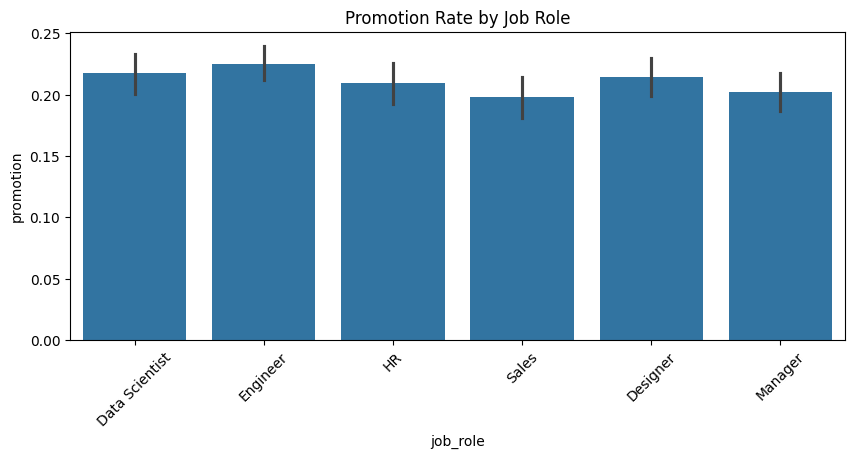

In [185]:

plt.figure(figsize=(10,4))
sns.barplot(data=df,x='job_role',y='promotion')
plt.xticks(rotation=45)
plt.title('Promotion Rate by Job Role')



Text(0.5, 1.0, 'Promotion Trend over Experience')

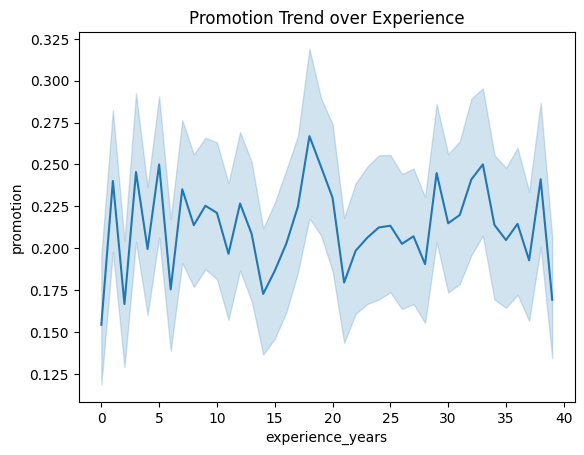

In [186]:



sns.lineplot( data=df, x='experience_years', y='promotion')
plt.title('Promotion Trend over Experience')


Text(0.5, 1.0, 'Promotion Trend over training_hours')

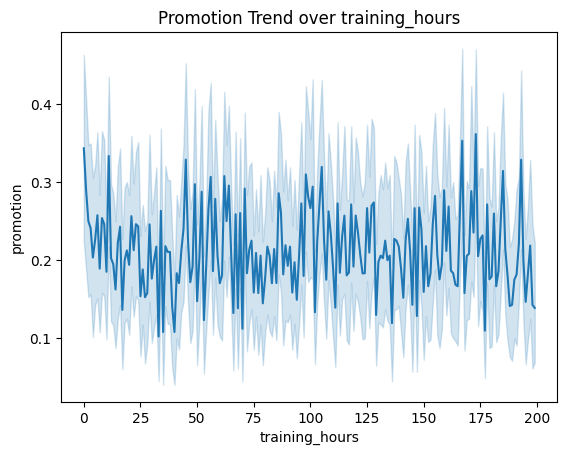

In [187]:
sns.lineplot( data=df, x='training_hours', y='promotion')
plt.title('Promotion Trend over training_hours')

Text(0.5, 1.0, 'Performance Distribution by Promotion')

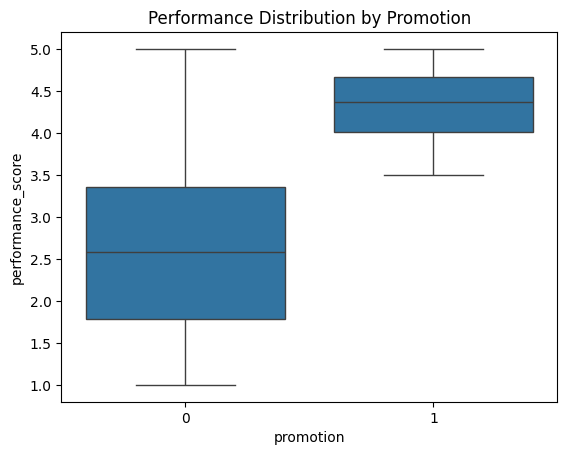

In [188]:

sns.boxplot( data=df,x='promotion',y='performance_score')
plt.title('Performance Distribution by Promotion')


In [189]:
fig = px.scatter_3d(df,x="experience_years",y="performance_score",z="training_hours",color="promotion",
    title="3D View: Experience vs Performance vs Training"
)
fig.show()


In [190]:
fig = px.bar(df, x="has_certifications", y="promotion",
    title="Effect of Certifications on Promotion"
)
fig.show()


In [191]:
df.shape

(15000, 21)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     15000 non-null  float64
 1   salary                  15000 non-null  float64
 2   experience_years        15000 non-null  float64
 3   working_hours_per_week  15000 non-null  float64
 4   performance_score       15000 non-null  float64
 5   projects_completed      15000 non-null  float64
 6   overtime_hours          15000 non-null  float64
 7   distance_from_home_km   15000 non-null  float64
 8   training_hours          15000 non-null  float64
 9   absent_days             15000 non-null  float64
 10  gender                  15000 non-null  object 
 11  education_level         15000 non-null  object 
 12  job_role                15000 non-null  object 
 13  department              15000 non-null  object 
 14  city                    15000 non-null

## drop columns

In [193]:
df.drop('age',axis=1,inplace=True)

In [194]:
df.drop('city',axis=1,inplace=True)

In [195]:
df.shape

(15000, 19)

In [196]:
df['job_role'].nunique()

6

# labels=[job_role',
# one hot=[gender,education_level,,company_type,marital_status,has_certifications,job_satisfaction

In [197]:
df.select_dtypes('object').columns

Index(['gender', 'education_level', 'job_role', 'department', 'company_type',
       'work_mode', 'marital_status', 'job_satisfaction'],
      dtype='object')

## encoding by one hot encoding

In [198]:
df.columns = df.columns.str.strip()

categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Categorical columns detected:")
print(categorical_cols)



Categorical columns detected:
['gender', 'education_level', 'job_role', 'department', 'company_type', 'work_mode', 'marital_status', 'job_satisfaction']


In [199]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import pickle
import os

os.makedirs("encoders", exist_ok=True)

df_encoded = df.copy()

for col in categorical_cols:
    print(f" Encoding -> {col}")

    ohe = OneHotEncoder(
        drop='first',
        handle_unknown='ignore',
        sparse_output=False
    )

    encoded = ohe.fit_transform(df_encoded[[col]])

    new_cols = ohe.get_feature_names_out([col])

    encoded_df = pd.DataFrame(
        encoded,
        columns=new_cols,
        index=df_encoded.index
    )

    df_encoded.drop(columns=[col], inplace=True)
    df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

    with open(f'encoders/{col}_ohe.pkl', 'wb') as f:
        pickle.dump(ohe, f)



df = df_encoded.copy()


 Encoding -> gender
 Encoding -> education_level
 Encoding -> job_role
 Encoding -> department
 Encoding -> company_type
 Encoding -> work_mode
 Encoding -> marital_status
 Encoding -> job_satisfaction


In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## save encoding

In [201]:
df.shape

(15000, 32)

In [202]:
df.head()

salary  experience_years  working_hours_per_week  performance_score  \
0   7250.0              16.0                    46.0               4.11   
1  18372.0               9.0                    41.0               2.60   
2  20279.0              11.0                    37.0               3.66   
3  33193.0              18.0                    24.0               2.58   
4  29868.0              39.0                    53.0               3.29   

   projects_completed  overtime_hours  distance_from_home_km  training_hours  \
0                15.0             7.0                   29.1           160.0   
1                29.0            19.0                   47.3            58.0   
2                33.0            21.0                   26.0            67.0   
3                 4.0            27.0                   18.8            48.0   
4                25.0            25.0                    4.4            14.0   

   absent_days  has_certifications  ...  department_IT  department_Marketing  \
0         15.0                 0.0  ...            0.0                   0.0   
1          9.0                 0.0  ...            0.0                   0.0   
2         28.0                 0.0  ...            0.0                   0.0   
3         13.0                 1.0  ...            0.0                   0.0   
4         13.0                 1.0  ...            0.0                   0.0   

   department_Operations  company_type_SME  company_type_Startup  \
0                    0.0               0.0                   1.0   
1                    1.0               1.0                   0.0   
2                    1.0               1.0                   0.0   
3                    1.0               0.0                   0.0   
4                    1.0               0.0                   1.0   

   work_mode_Onsite  work_mode_Remote  marital_status_Single  \
0               1.0               0.0                    0.0   
1               0.0               1.0                    0.0   
2               1.0               0.0                    0.0   
3               0.0               1.0                    1.0   
4               0.0               0.0                    0.0   

   job_satisfaction_Low  job_satisfaction_Medium  
0                   0.0                      1.0  
1                   0.0                      1.0  
2                   0.0                      0.0  
3                   0.0                      1.0  
4                   1.0                      0.0  

[5 rows x 32 columns]

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   salary                       15000 non-null  float64
 1   experience_years             15000 non-null  float64
 2   working_hours_per_week       15000 non-null  float64
 3   performance_score            15000 non-null  float64
 4   projects_completed           15000 non-null  float64
 5   overtime_hours               15000 non-null  float64
 6   distance_from_home_km        15000 non-null  float64
 7   training_hours               15000 non-null  float64
 8   absent_days                  15000 non-null  float64
 9   has_certifications           15000 non-null  float64
 10  promotion                    15000 non-null  int64  
 11  gender_Male                  15000 non-null  float64
 12  education_level_High School  15000 non-null  float64
 13  education_level_

##**split data**

In [204]:

x=df.drop('promotion',axis=1)
y=df['promotion']

In [205]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                 shuffle=True,random_state=42,stratify=y)

##**scaling by standard scaler**

In [206]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

##**save scaleing**

In [207]:
pickle.dump(scaler,open("standard_scaler.pkl","wb"))

##**feature selection to important columns**

In [208]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(x_train, y_train)
X_test_selected  = selector.transform(x_test)


In [209]:
import pickle

with open("selector.pkl", "wb") as f:
    pickle.dump(selector, f)

with open("X_selected.pkl", "wb") as f:
    pickle.dump((X_train_selected, X_test_selected), f)


In [216]:
X_train_selected


array([[ 0.96745207,  1.76203302,  1.19386969, ..., -0.79945002,
        -0.66180573, -0.80155201],
       [ 0.95875464,  0.0290811 , -1.44352383, ..., -0.79945002,
        -0.66180573,  1.24757968],
       [-0.19800351,  1.4732077 ,  1.07920041, ...,  1.25085993,
         1.51101745, -0.80155201],
       ...,
       [-1.09383877,  0.0290811 , -1.21418526, ...,  1.25085993,
        -0.66180573,  1.24757968],
       [ 0.419514  ,  0.89555706,  0.84986184, ...,  1.25085993,
         1.51101745, -0.80155201],
       [-1.17211564,  0.0290811 , -0.296831  , ...,  1.25085993,
        -0.66180573,  1.24757968]])

In [212]:
selector.get_feature_names_out()

array(['x3', 'x4', 'x5', 'x8', 'x9', 'x10', 'x11', 'x13', 'x15', 'x17',
       'x18', 'x23', 'x25', 'x29', 'x30'], dtype=object)

In [213]:
!pip install xgboost lightgbm catboost

## models

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,CategoricalNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import  HistGradientBoostingClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from catboost import  CatBoostClassifier
import lightgbm as lgb
from lightgbm import  LGBMClassifier








In [215]:
models={
    "logistic regression":LogisticRegression(),
    "GaussianNB":GaussianNB(),
    "BernoulliNB":BernoulliNB(),
    "knn" : KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1),
    "svm":SVC(kernel="linear",C=150,gamma=5,probability=True),
    "Decision Tree":DecisionTreeClassifier(criterion='entropy',max_depth=15),
    "Random Forest":RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=20),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=130, random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',max_depth=10),n_estimators=50, random_state=42),
    "ada bosting":AdaBoostClassifier(n_estimators=60,random_state=42),
    "Gradient boosting":GradientBoostingClassifier(n_estimators=60,learning_rate=0.1,random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, iterations=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

}

In [217]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix,classification_report,roc_curve,auc
from sklearn.metrics import precision_recall_curve, average_precision_score

[[2223  140]
 [ 155  482]]


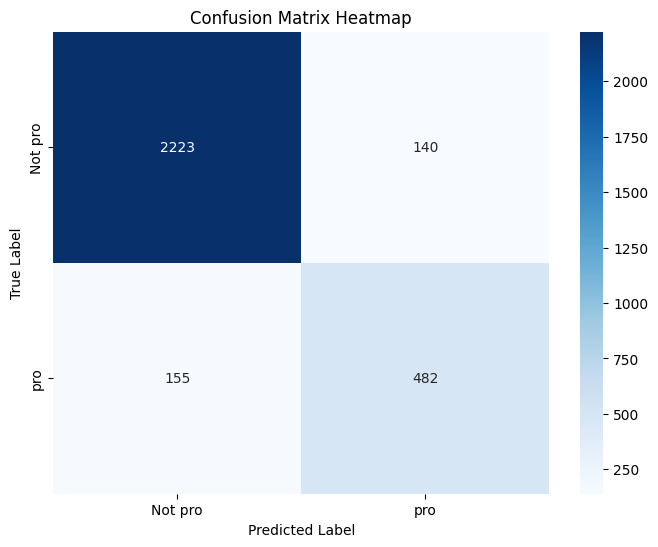

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2363
           1       0.77      0.76      0.77       637

    accuracy                           0.90      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.90      0.90      0.90      3000



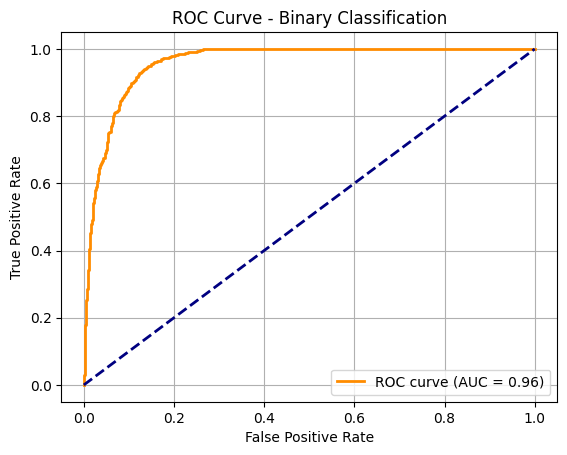

Average Precision (AP): 0.836


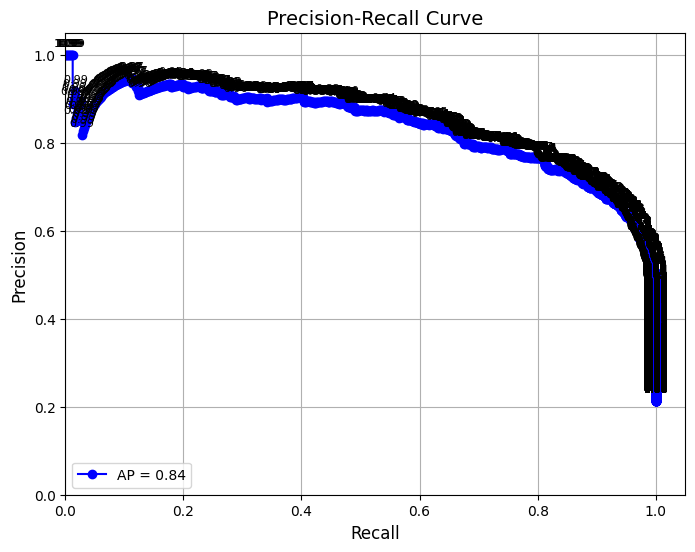

[[2169  194]
 [ 115  522]]


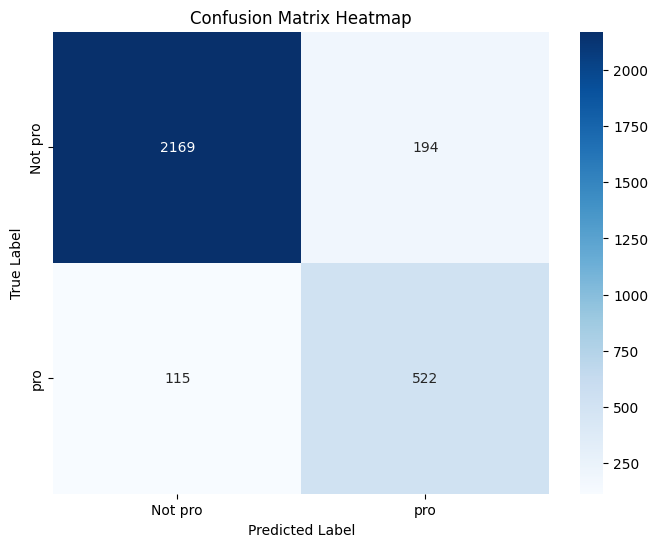

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2363
           1       0.73      0.82      0.77       637

    accuracy                           0.90      3000
   macro avg       0.84      0.87      0.85      3000
weighted avg       0.90      0.90      0.90      3000



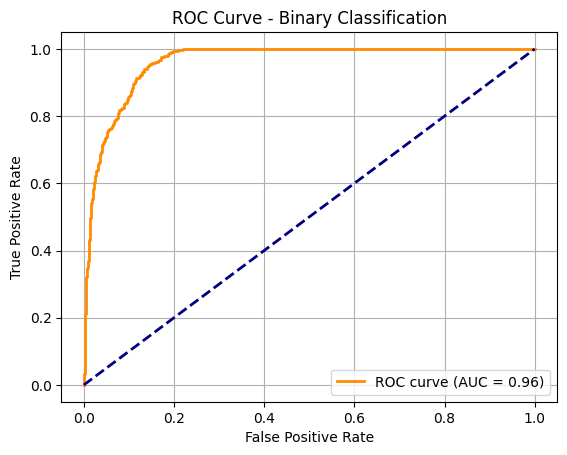

Average Precision (AP): 0.847


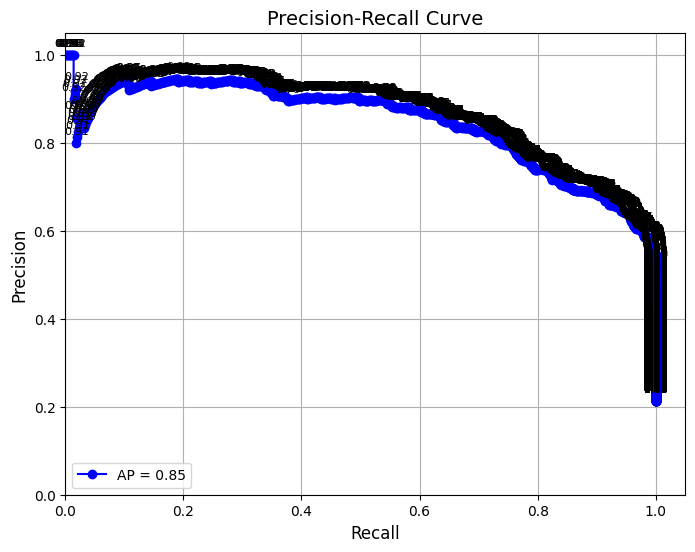

[[2239  124]
 [ 415  222]]


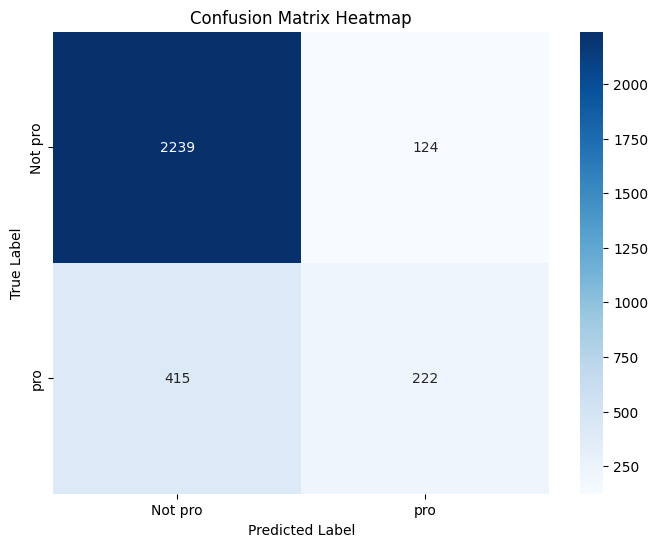

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2363
           1       0.64      0.35      0.45       637

    accuracy                           0.82      3000
   macro avg       0.74      0.65      0.67      3000
weighted avg       0.80      0.82      0.80      3000



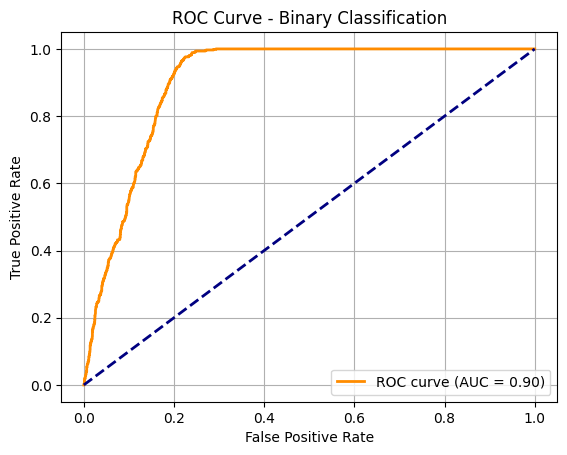

Average Precision (AP): 0.615


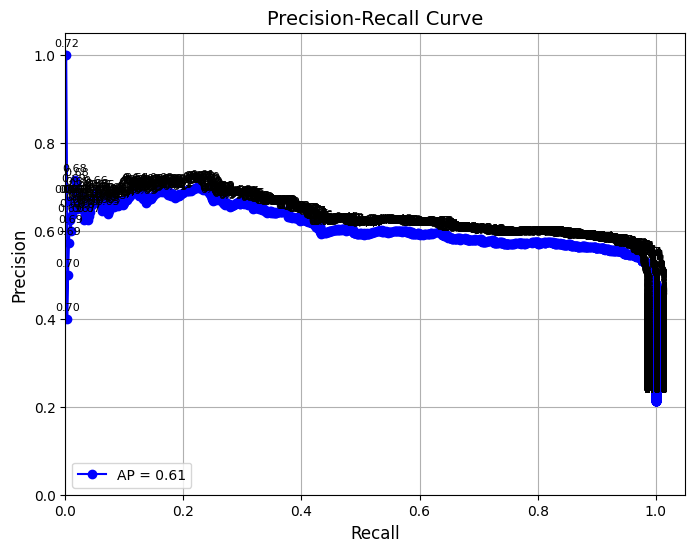

[[2253  110]
 [ 238  399]]


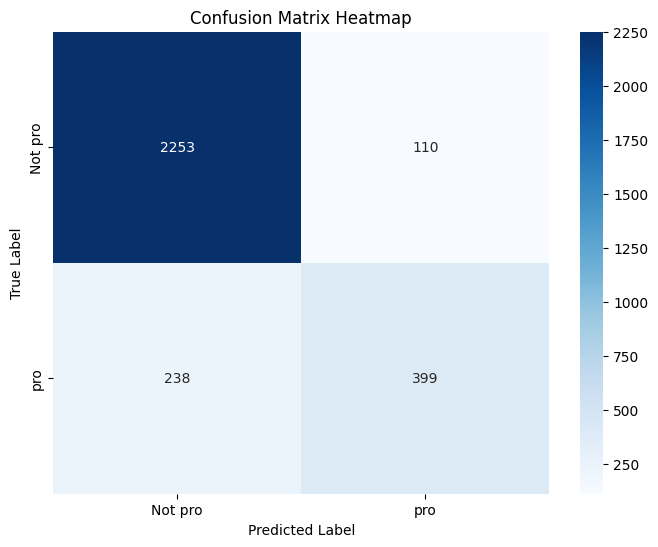

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2363
           1       0.78      0.63      0.70       637

    accuracy                           0.88      3000
   macro avg       0.84      0.79      0.81      3000
weighted avg       0.88      0.88      0.88      3000



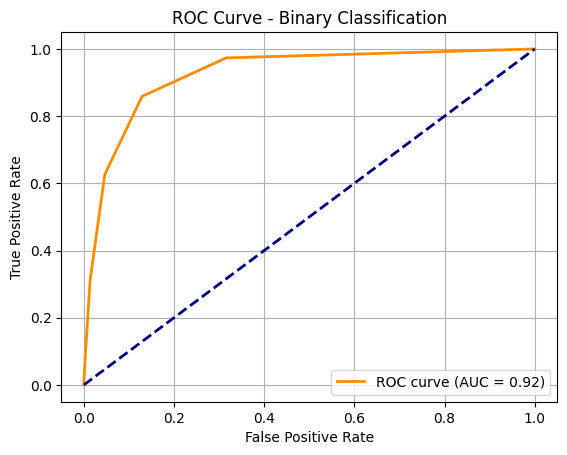

Average Precision (AP): 0.723


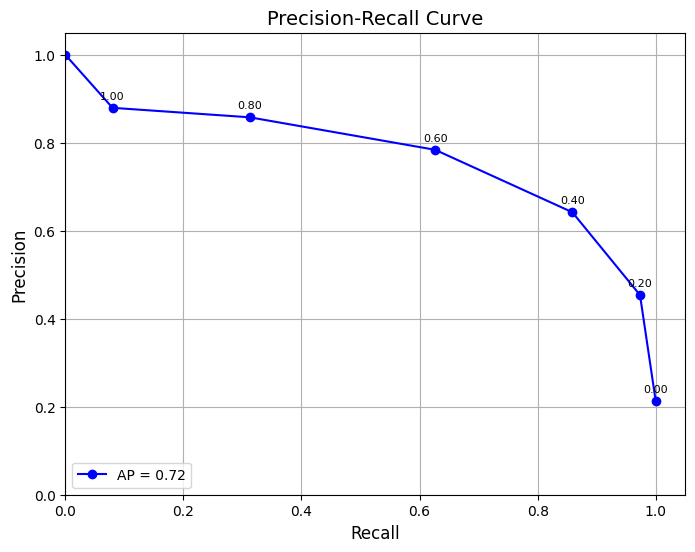

[[2221  142]
 [ 140  497]]


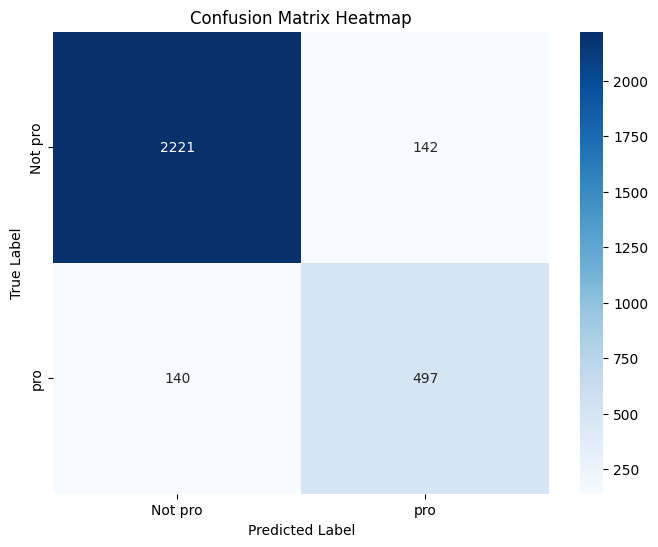

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2363
           1       0.78      0.78      0.78       637

    accuracy                           0.91      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.91      0.91      0.91      3000



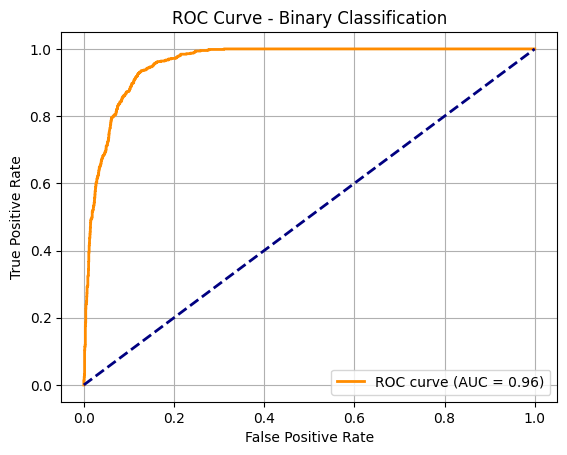

Average Precision (AP): 0.837


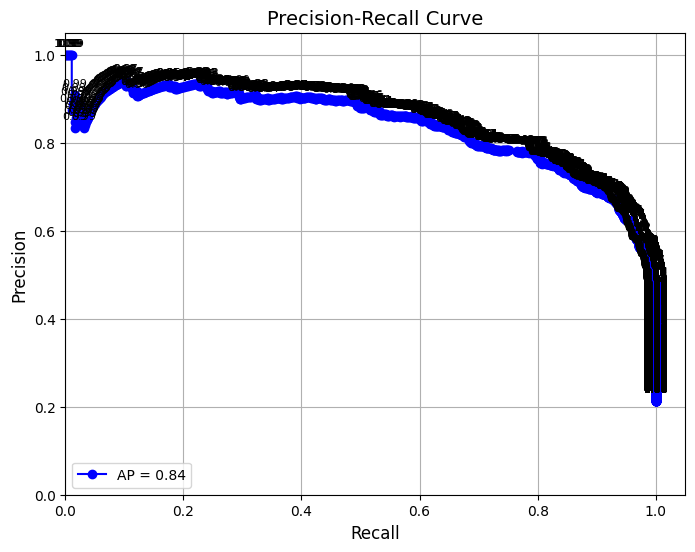

[[2306   57]
 [  67  570]]


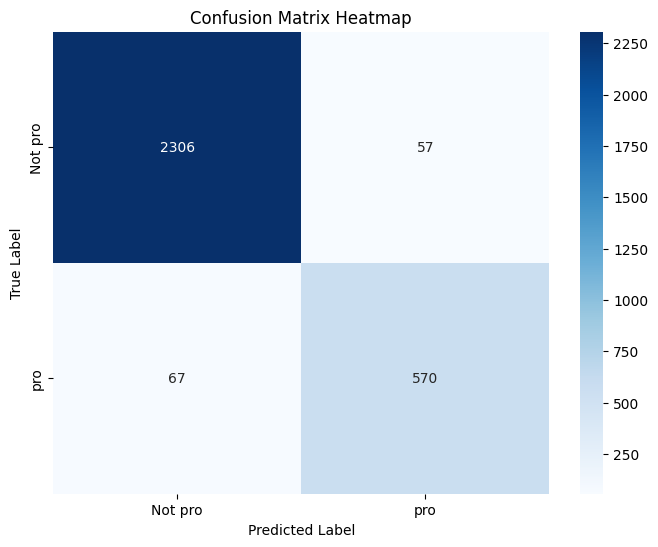

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2363
           1       0.91      0.89      0.90       637

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



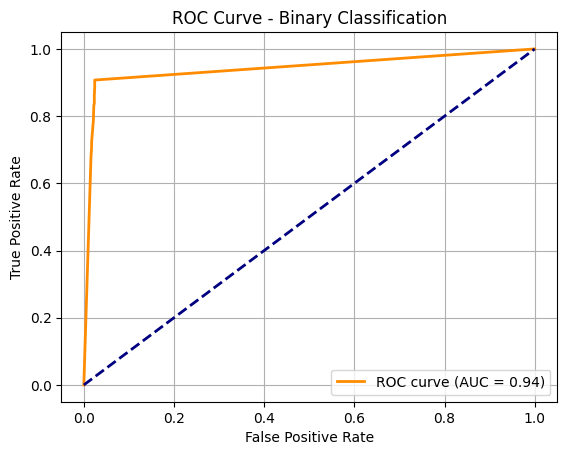

Average Precision (AP): 0.852


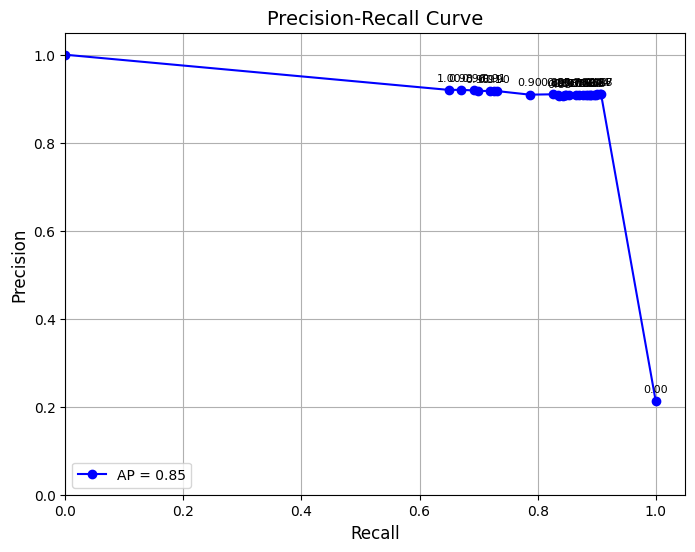

[[2300   63]
 [   3  634]]


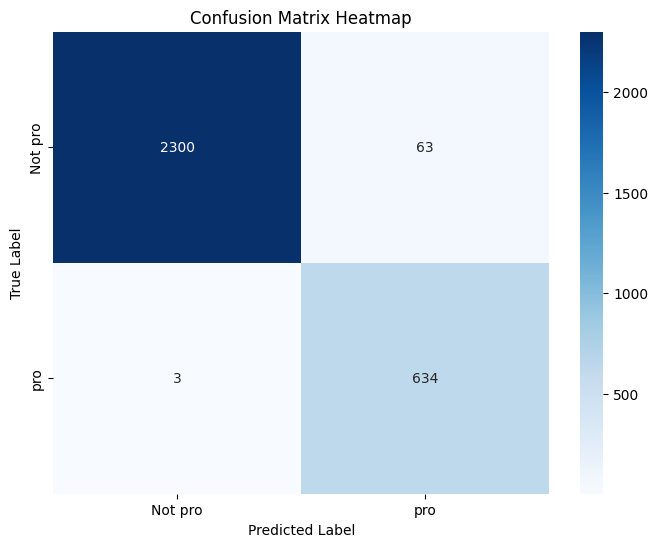

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      1.00      0.95       637

    accuracy                           0.98      3000
   macro avg       0.95      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



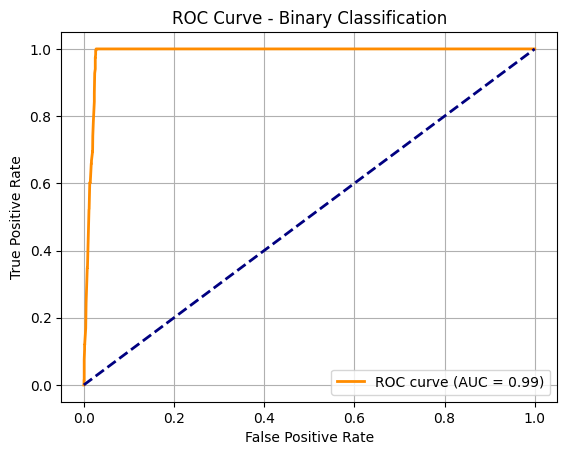

Average Precision (AP): 0.919


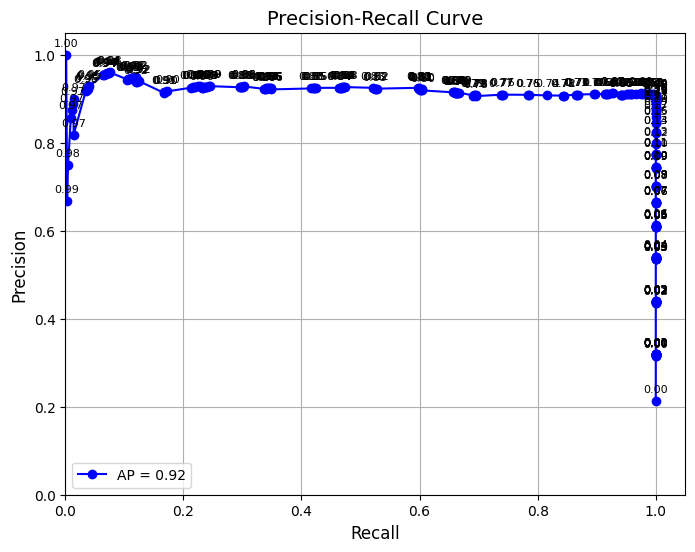

[[2301   62]
 [ 107  530]]


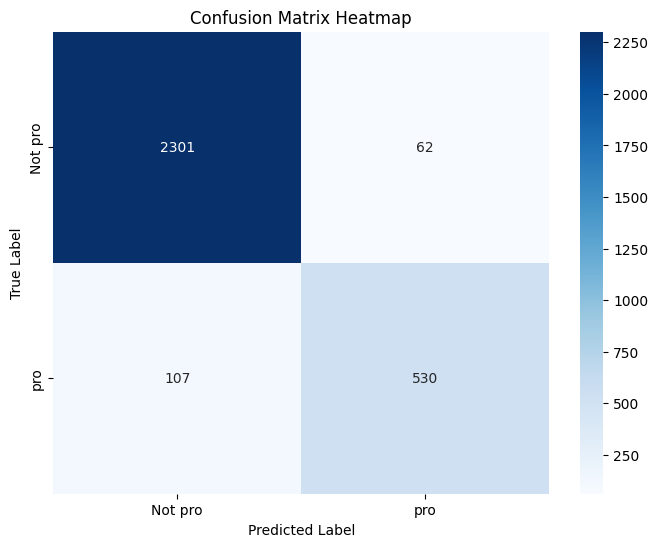

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2363
           1       0.90      0.83      0.86       637

    accuracy                           0.94      3000
   macro avg       0.93      0.90      0.91      3000
weighted avg       0.94      0.94      0.94      3000



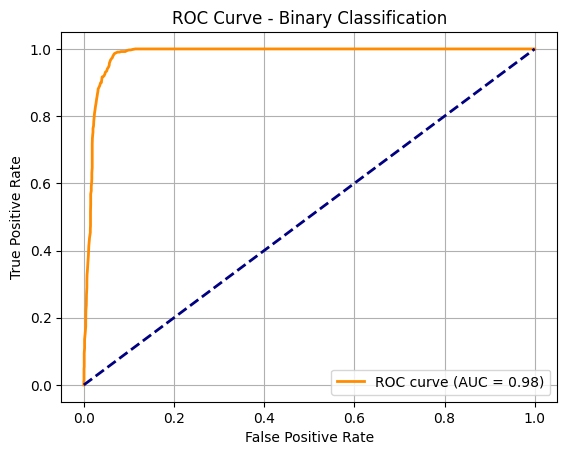

Average Precision (AP): 0.906


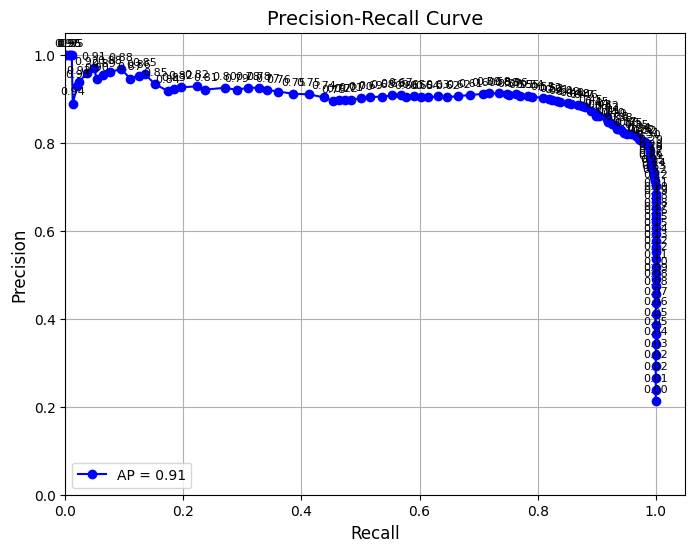

[[2302   61]
 [   4  633]]


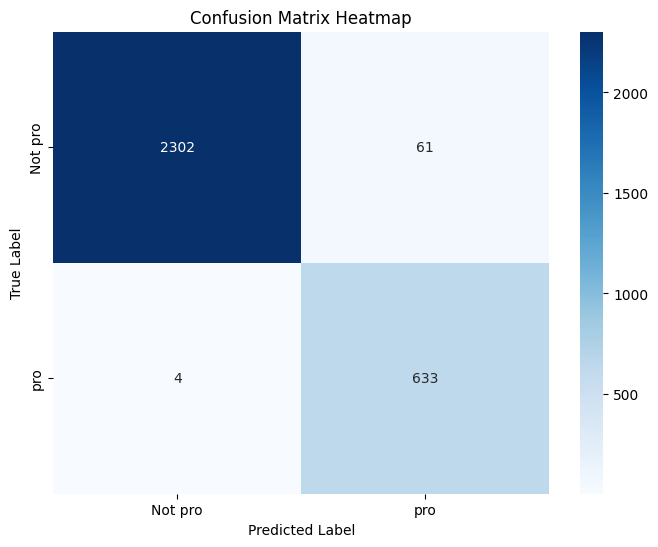

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      0.99      0.95       637

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



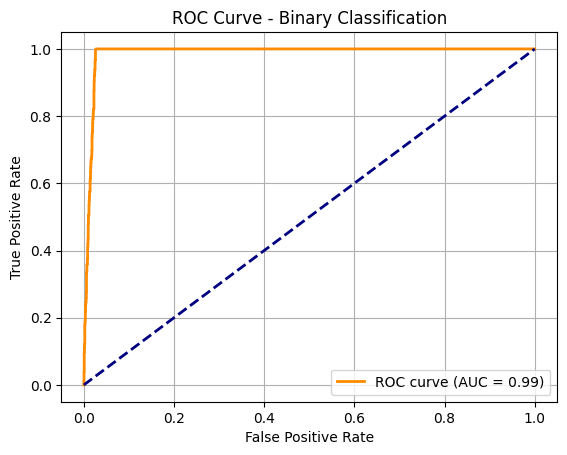

Average Precision (AP): 0.927


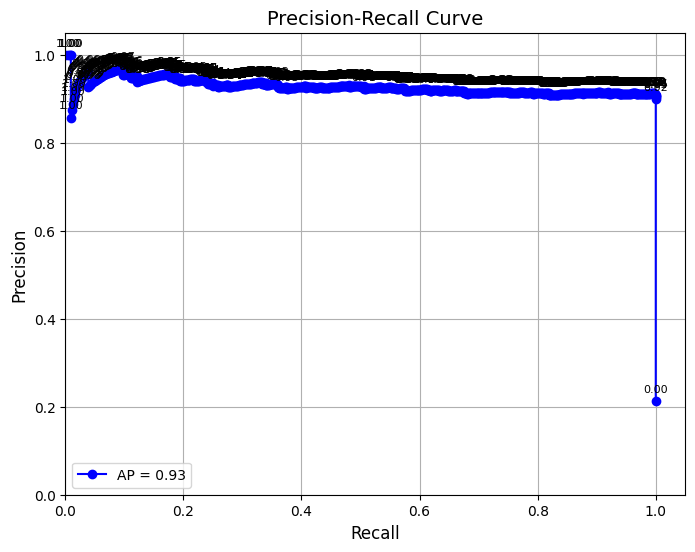

[[2293   70]
 [  90  547]]


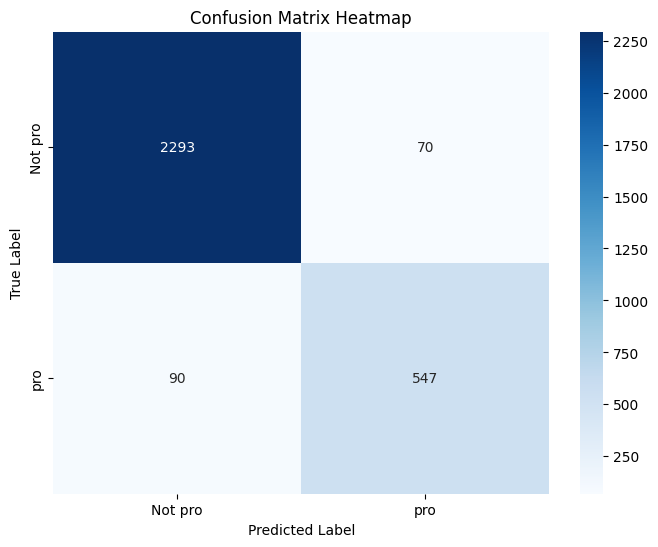

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2363
           1       0.89      0.86      0.87       637

    accuracy                           0.95      3000
   macro avg       0.92      0.91      0.92      3000
weighted avg       0.95      0.95      0.95      3000



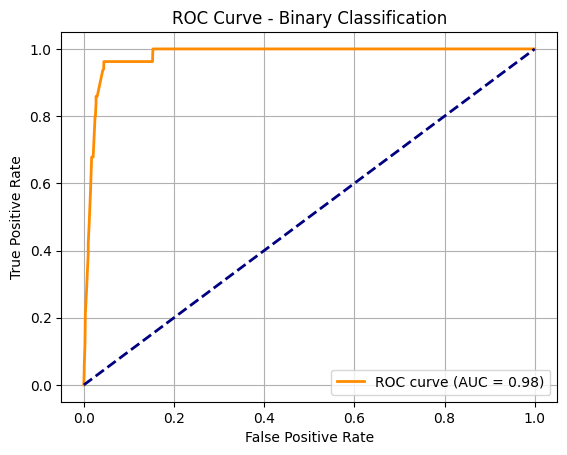

Average Precision (AP): 0.900


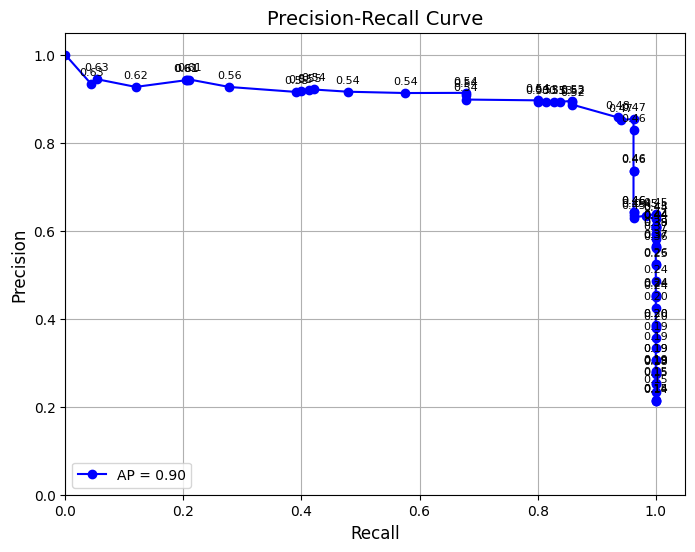

[[2301   62]
 [   0  637]]


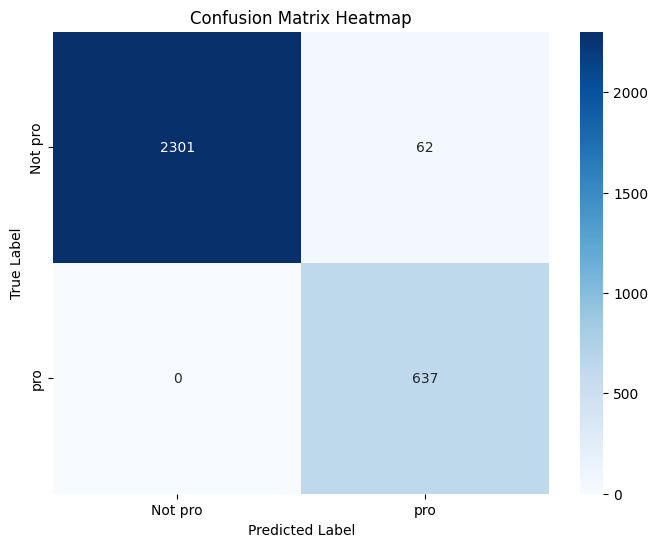

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      1.00      0.95       637

    accuracy                           0.98      3000
   macro avg       0.96      0.99      0.97      3000
weighted avg       0.98      0.98      0.98      3000



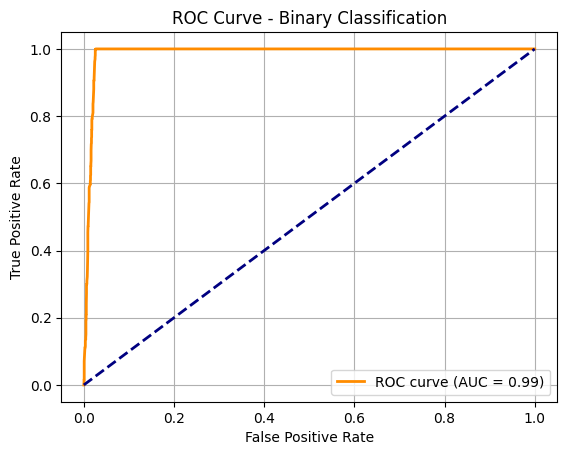

Average Precision (AP): 0.920


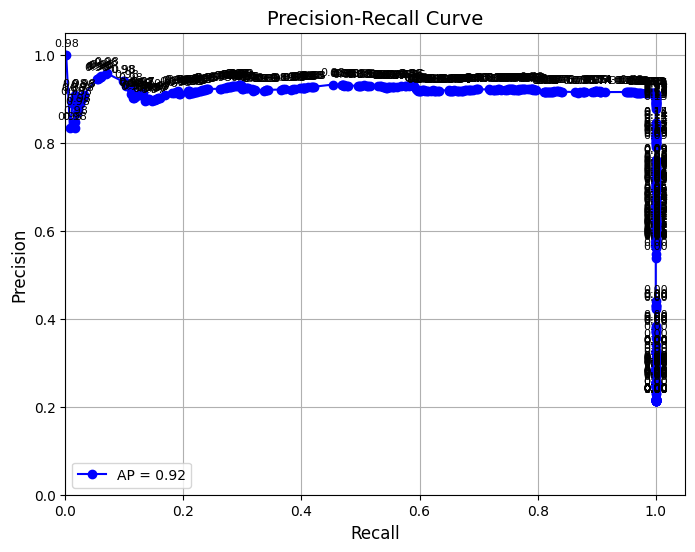

[[2302   61]
 [   6  631]]


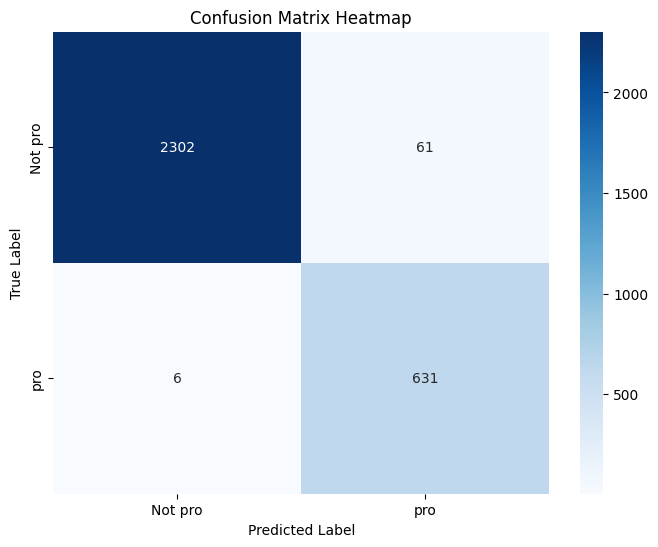

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      0.99      0.95       637

    accuracy                           0.98      3000
   macro avg       0.95      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



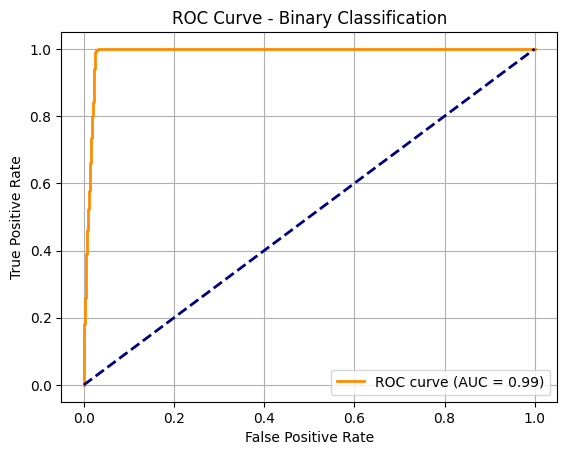

Average Precision (AP): 0.938


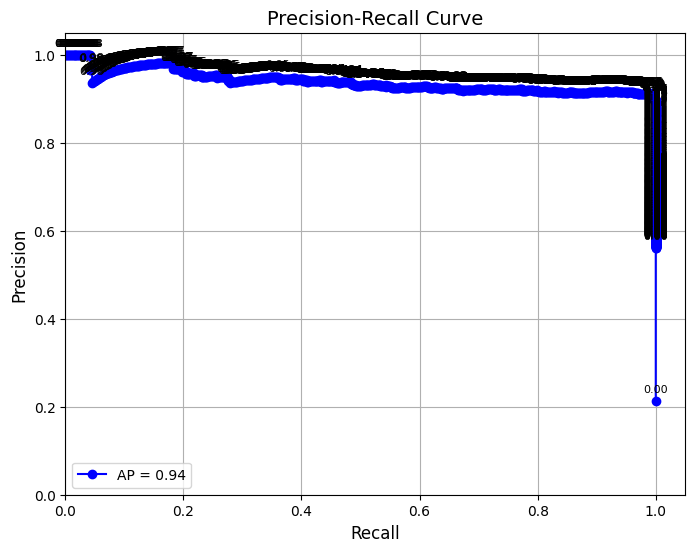

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[00:41:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




[[2302   61]
 [   2  635]]


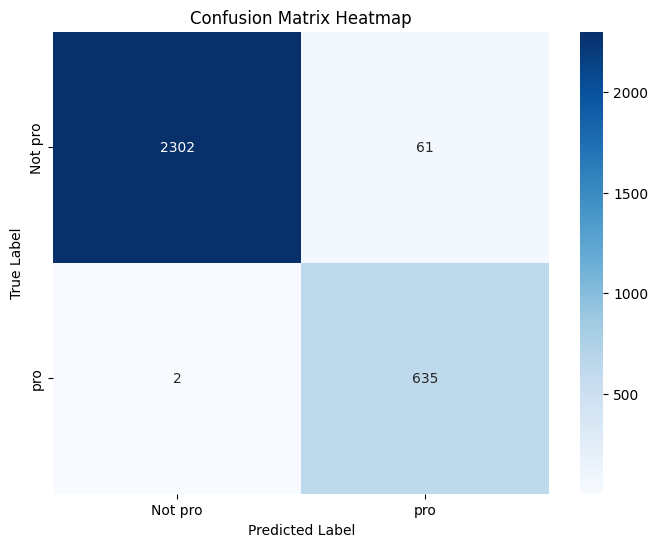

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      1.00      0.95       637

    accuracy                           0.98      3000
   macro avg       0.96      0.99      0.97      3000
weighted avg       0.98      0.98      0.98      3000



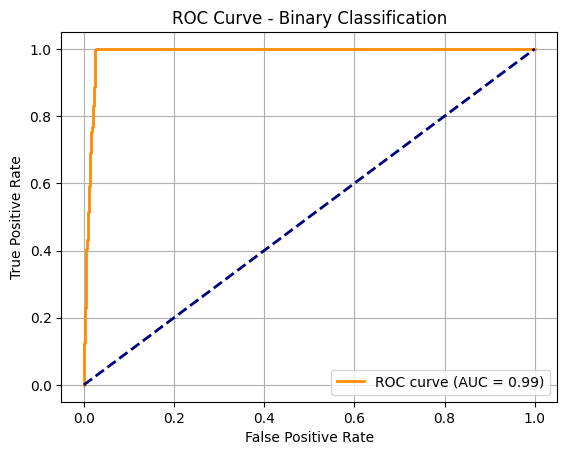

Average Precision (AP): 0.936


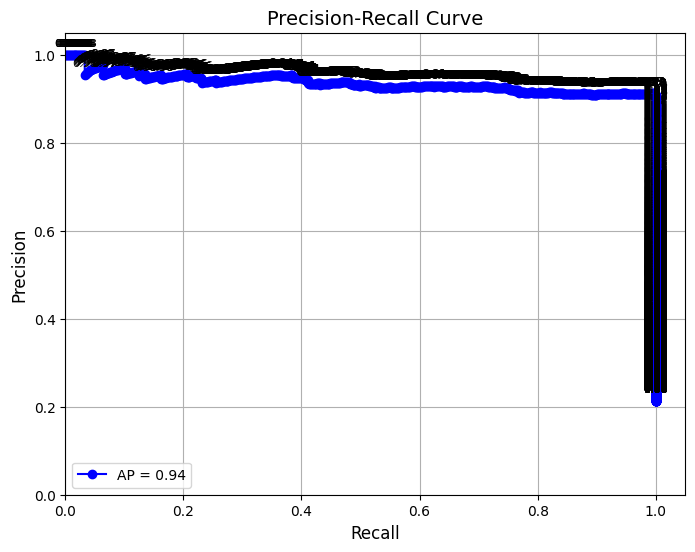

[[2302   61]
 [   2  635]]


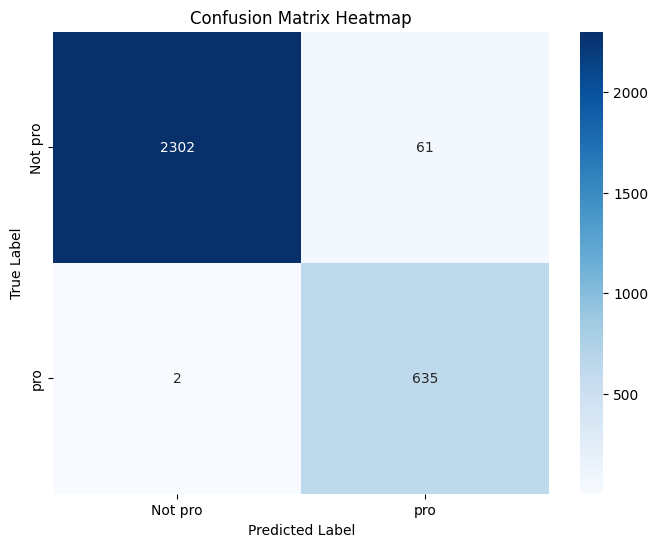

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      1.00      0.95       637

    accuracy                           0.98      3000
   macro avg       0.96      0.99      0.97      3000
weighted avg       0.98      0.98      0.98      3000



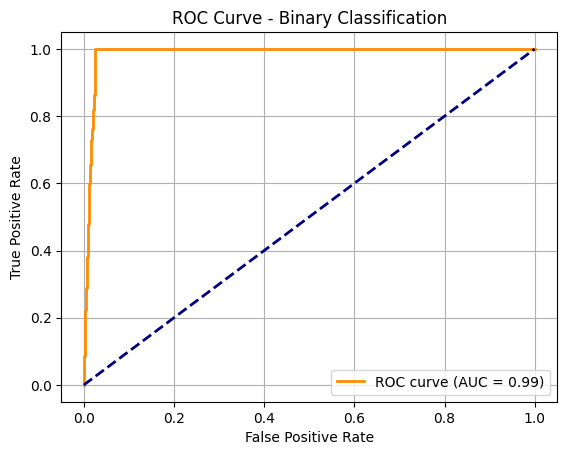

Average Precision (AP): 0.929


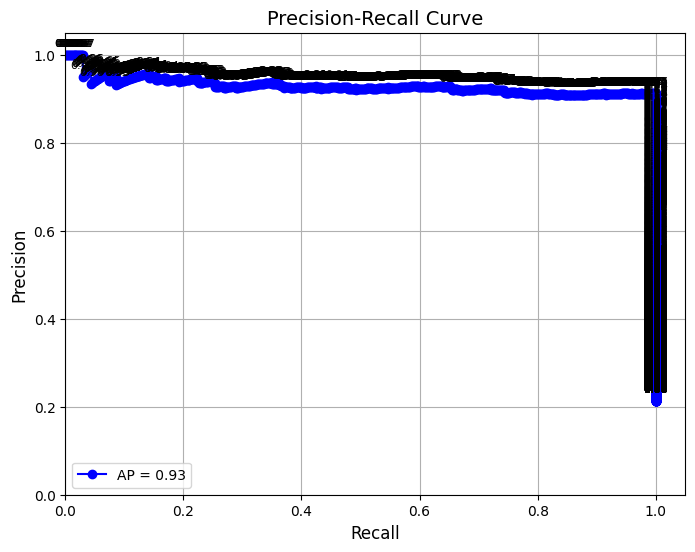

[LightGBM] [Info] Number of positive: 2549, number of negative: 9451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212417 -> initscore=-1.310419
[LightGBM] [Info] Start training from score -1.310419


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[[2303   60]
 [   5  632]]


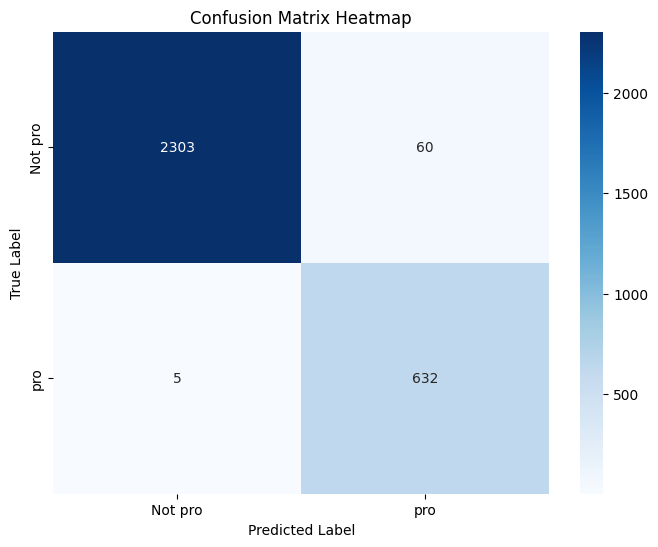

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      0.99      0.95       637

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



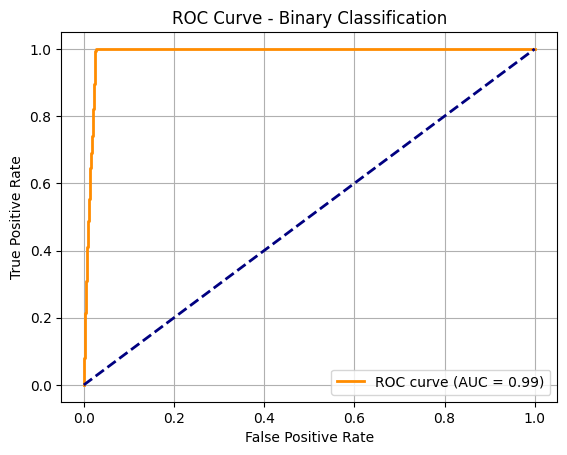

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



Average Precision (AP): 0.926


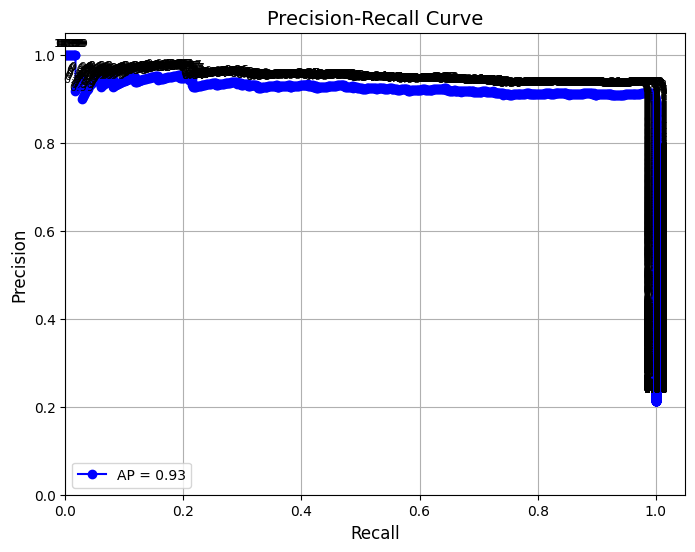

In [218]:
accuracy=[]
for model_name , model in models.items():
    model.fit(X_train_selected,y_train)
    y_pred_train = model.predict(X_train_selected)
    y_pred_test = model.predict(X_test_selected)

    Acc_Train = accuracy_score(y_train,y_pred_train)
    Acc_Test  =  accuracy_score(y_test,y_pred_test)


    Pre_Train = precision_score(y_train,y_pred_train)
    Pre_Test  =  precision_score(y_test,y_pred_test)

    Rec_Train = recall_score(y_train,y_pred_train)
    Rec_Test  =  recall_score(y_test,y_pred_test)

    F1_Train = f1_score(y_train,y_pred_train)
    F1_Test  =  f1_score(y_test,y_pred_test)

    accuracy.append([Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test])
    class_names=['Not pro','pro']
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    print(classification_report(y_test,y_pred_test))
    y_probs = model.predict_proba(X_test_selected)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Binary Classification')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


    y_pred_prob = model.predict_proba(X_test_selected)[:, 1]

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    ap = average_precision_score(y_test, y_pred_prob)
    print(f"Average Precision (AP): {ap:.3f}")

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='o', color='blue', label=f'AP = {ap:.2f}')

    for r, p, t in zip(recall, precision, list(thresholds) + [None]):
        if t is not None:
            plt.text(r, p + 0.02, f'{t:.2f}', fontsize=8, ha='center')

    plt.title('Precision-Recall Curve', fontsize=14)
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.show()

In [219]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train",
                               "Acc_Test","Pre_Test","Rec_Test","F1_Test"],index=models.keys())

Acc_Train  Pre_Train  Rec_Train  F1_Train  Acc_Test  \
logistic regression    0.909417   0.802066   0.761475  0.781244  0.901667   
GaussianNB             0.904000   0.748488   0.825422  0.785075  0.897000   
BernoulliNB            0.820667   0.641281   0.353472  0.455741  0.820333   
knn                    0.930083   0.887931   0.767752  0.823480  0.884000   
svm                    0.910917   0.798147   0.777168  0.787517  0.906000   
Decision Tree          0.991250   0.967125   0.992546  0.979671  0.958667   
Random Forest          1.000000   1.000000   1.000000  1.000000  0.978000   
ExtraTrees             1.000000   1.000000   1.000000  1.000000  0.943667   
Bagging                0.980417   0.915589   1.000000  0.955935  0.978333   
ada bosting            0.946000   0.885286   0.856807  0.870813  0.946667   
Gradient boosting      0.978667   0.909318   0.999215  0.952150  0.979333   
HistGradientBoosting   0.984167   0.930632   1.000000  0.964070  0.977667   
XGBoost                0.981000   0.917897   1.000000  0.957191  0.979000   
CatBoost               0.978250   0.908863   0.997646  0.951188  0.979000   
LightGBM               0.988333   0.947936   1.000000  0.973272  0.978333   

                      Pre_Test  Rec_Test   F1_Test  
logistic regression   0.774920  0.756672  0.765687  
GaussianNB            0.729050  0.819466  0.771619  
BernoulliNB           0.641618  0.348509  0.451679  
knn                   0.783890  0.626374  0.696335  
svm                   0.777778  0.780220  0.778997  
Decision Tree         0.909091  0.894819  0.901899  
Random Forest         0.909613  0.995290  0.950525  
ExtraTrees            0.895270  0.832025  0.862490  
Bagging               0.912104  0.993721  0.951165  
ada bosting           0.886548  0.858713  0.872408  
Gradient boosting     0.911302  1.000000  0.953593  
HistGradientBoosting  0.911850  0.990581  0.949586  
XGBoost               0.912356  0.996860  0.952738  
CatBoost              0.912356  0.996860  0.952738  
LightGBM              0.913295  0.992151  0.951091

## show data is balanced or unbalanced

In [220]:
from sklearn.metrics import balanced_accuracy_score
balance=balanced_accuracy_score(y_test,y_pred_test)
balance

np.float64(0.983379627445887)

In [221]:
df['promotion'].value_counts()

promotion
0    11814
1     3186
Name: count, dtype: int64

## models use class weight
## LogisticRegression
## SVC
##DecisionTreeClassifier
## RandomForestClassifier
##ExtraTreesClassifier

##**balance data by class weight**

In [222]:
models={
    "logistic regression":LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    "GaussianNB":GaussianNB(),
    "BernoulliNB":BernoulliNB(),
    "knn" : KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1),
    "svm":SVC(kernel="linear",C=150,gamma=5,probability=True,class_weight='balanced'),
    "Decision Tree":DecisionTreeClassifier(criterion='entropy',max_depth=15,class_weight='balanced',random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=20,class_weight='balanced',random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=130, random_state=42,class_weight='balanced'),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',max_depth=10,class_weight='balanced'),n_estimators=50, random_state=42),
     "ada bosting":AdaBoostClassifier(n_estimators=60,random_state=42),
    "Gradient boosting":GradientBoostingClassifier(n_estimators=60,learning_rate=0.1,random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, iterations=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

[[2070  293]
 [  45  592]]


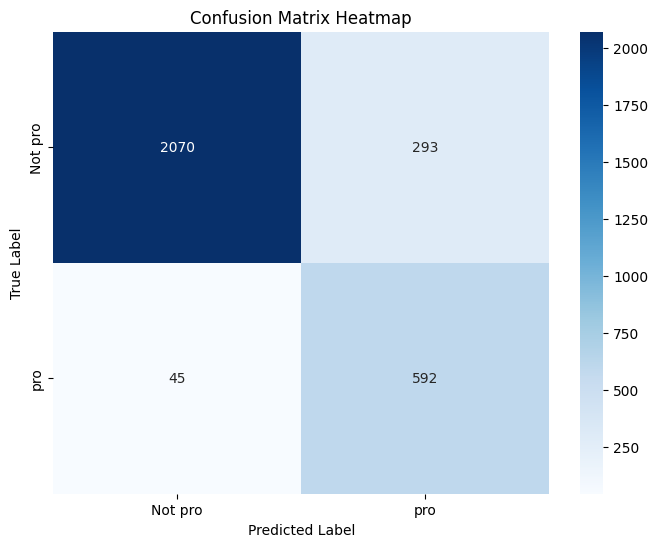

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      2363
           1       0.67      0.93      0.78       637

    accuracy                           0.89      3000
   macro avg       0.82      0.90      0.85      3000
weighted avg       0.91      0.89      0.89      3000



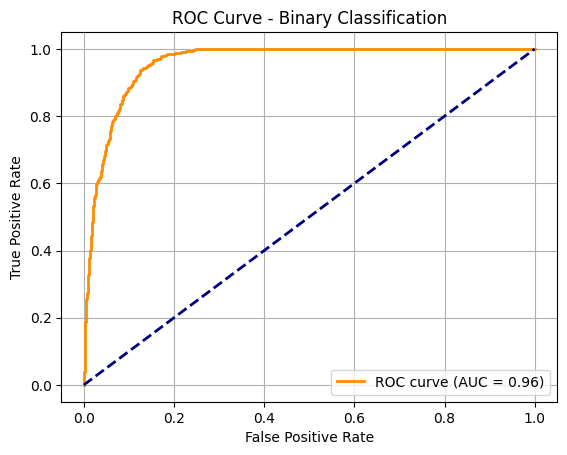

Average Precision (AP): 0.833


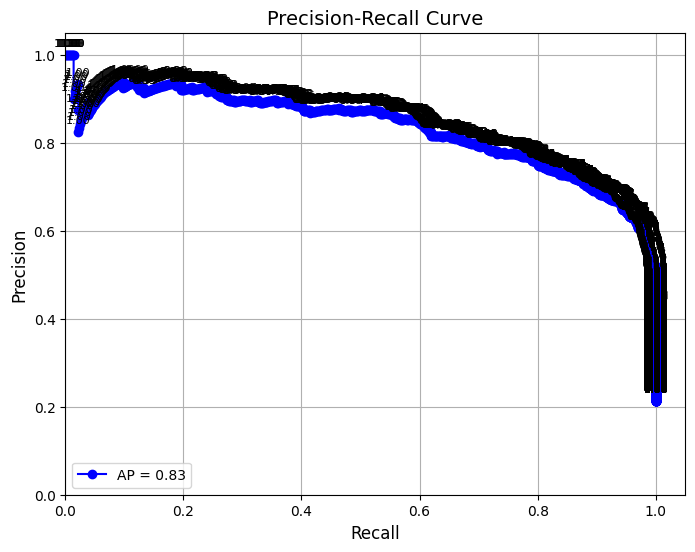

[[2169  194]
 [ 115  522]]


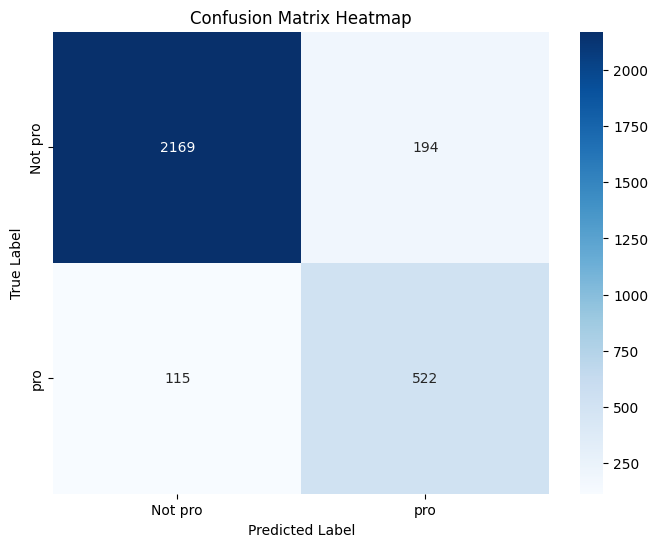

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2363
           1       0.73      0.82      0.77       637

    accuracy                           0.90      3000
   macro avg       0.84      0.87      0.85      3000
weighted avg       0.90      0.90      0.90      3000



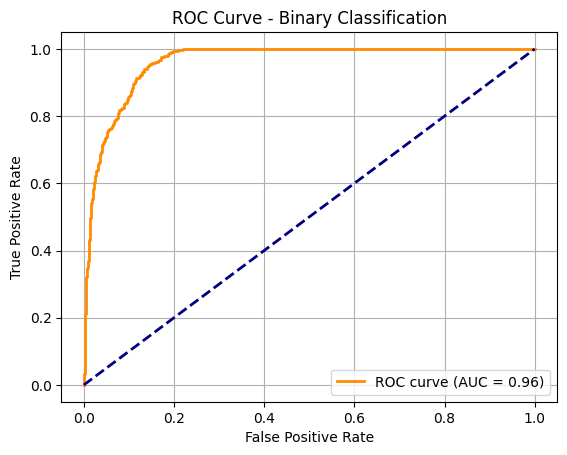

Average Precision (AP): 0.847


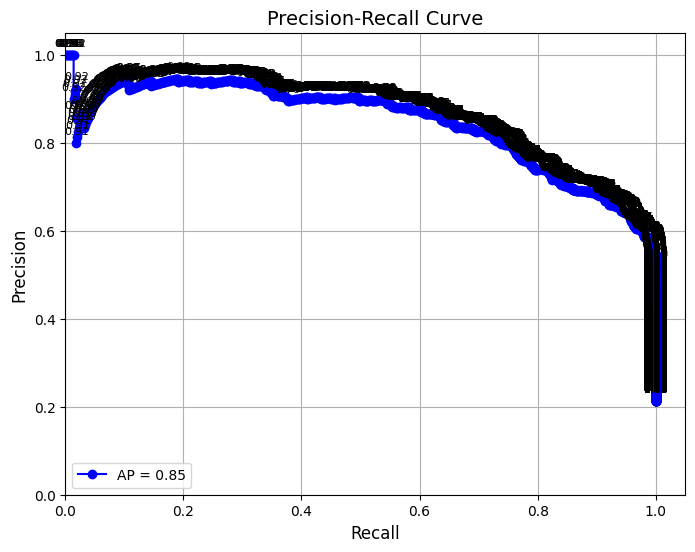

[[2239  124]
 [ 415  222]]


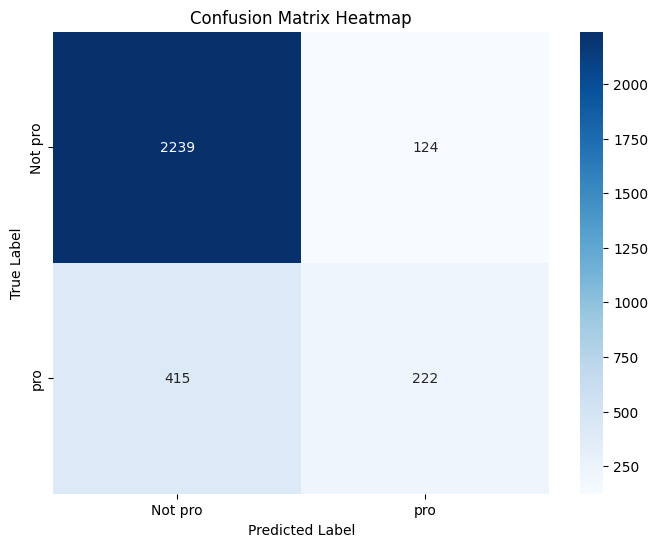

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2363
           1       0.64      0.35      0.45       637

    accuracy                           0.82      3000
   macro avg       0.74      0.65      0.67      3000
weighted avg       0.80      0.82      0.80      3000



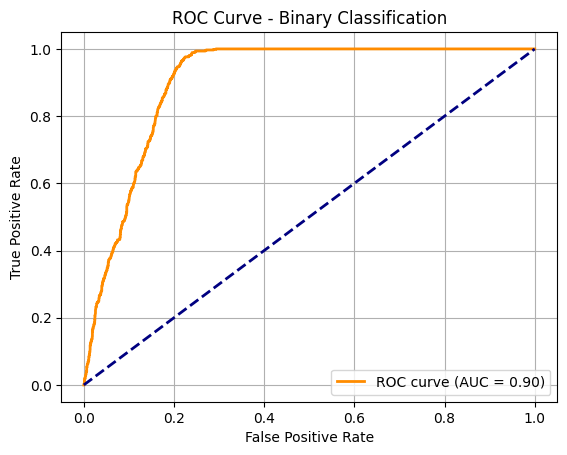

Average Precision (AP): 0.615


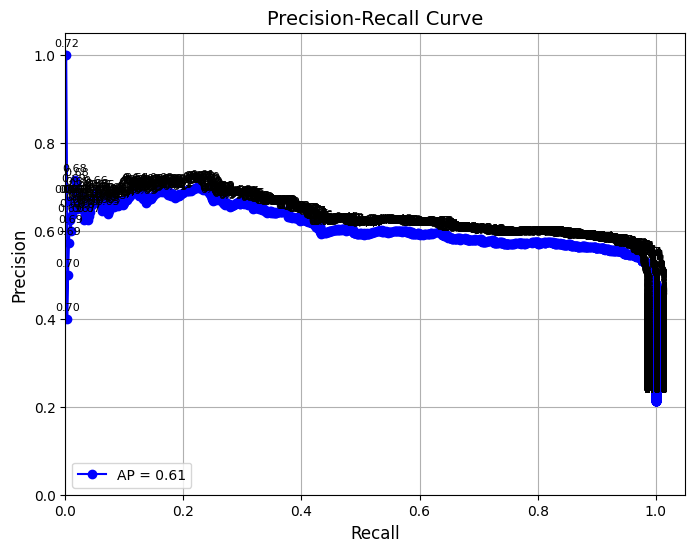

[[2253  110]
 [ 238  399]]


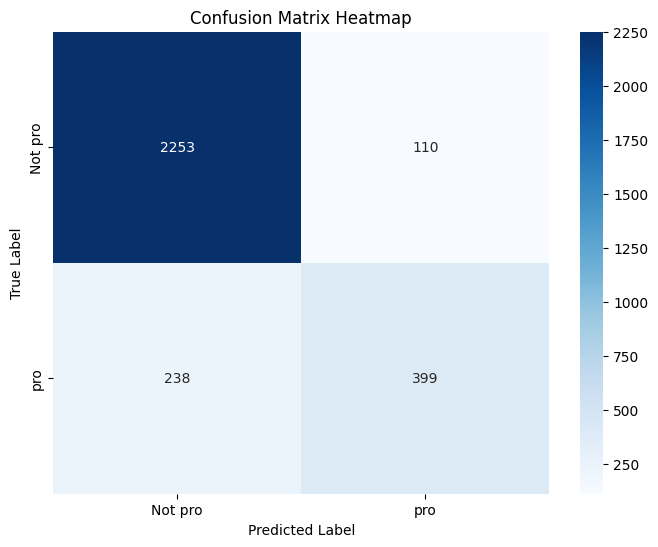

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2363
           1       0.78      0.63      0.70       637

    accuracy                           0.88      3000
   macro avg       0.84      0.79      0.81      3000
weighted avg       0.88      0.88      0.88      3000



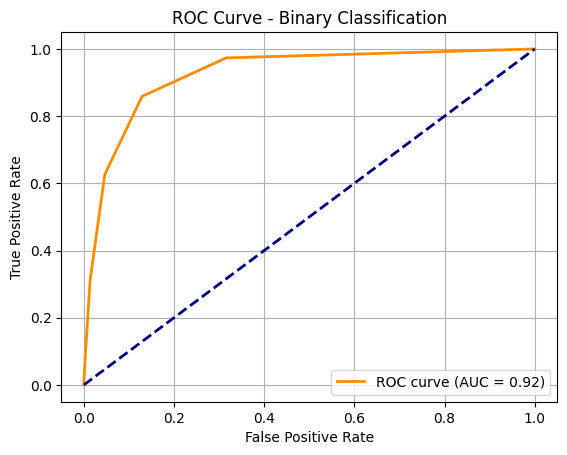

Average Precision (AP): 0.723


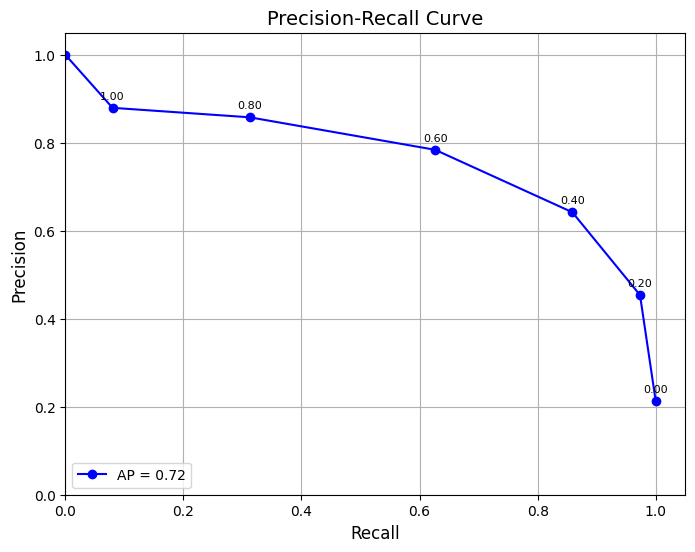

[[2043  320]
 [  37  600]]


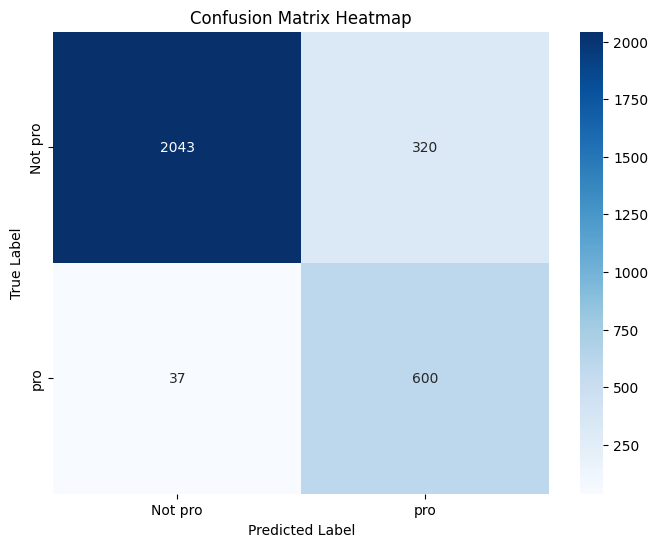

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      2363
           1       0.65      0.94      0.77       637

    accuracy                           0.88      3000
   macro avg       0.82      0.90      0.85      3000
weighted avg       0.91      0.88      0.89      3000



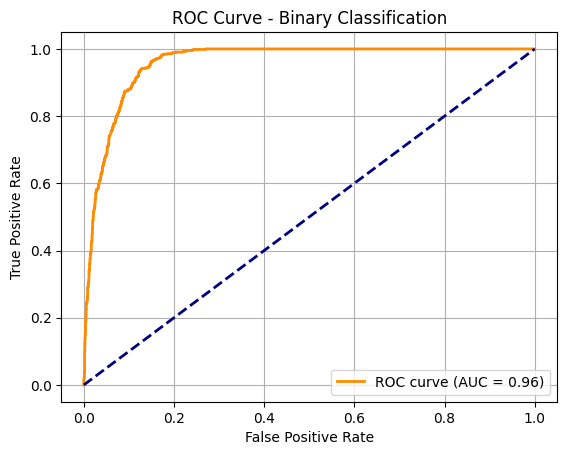

Average Precision (AP): 0.829


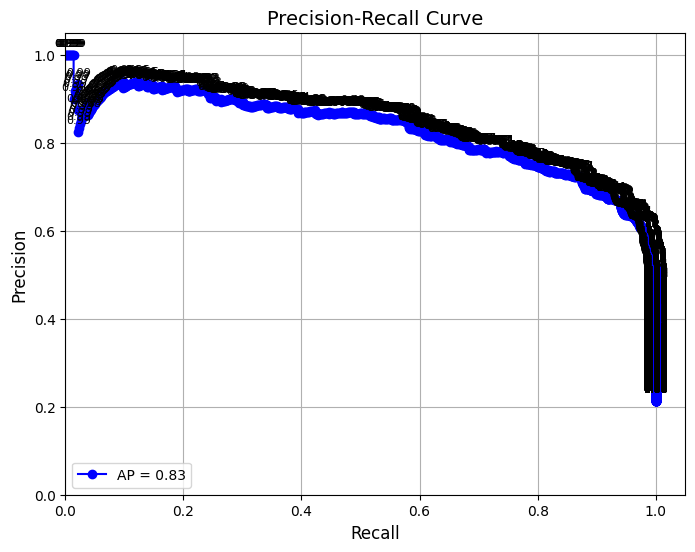

[[2306   57]
 [  45  592]]


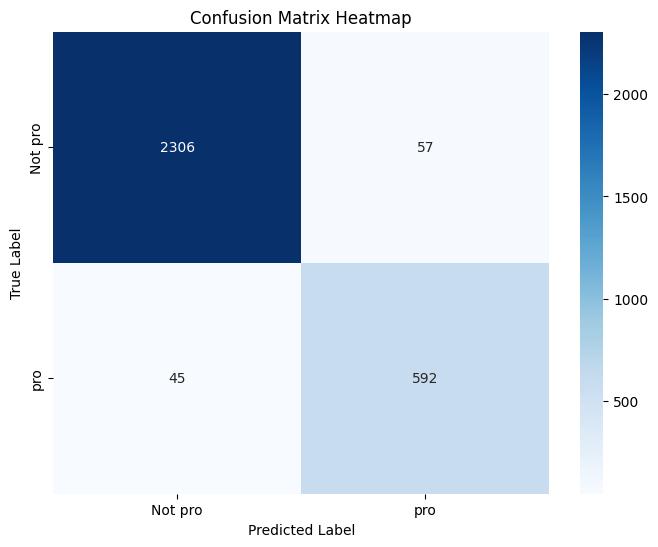

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2363
           1       0.91      0.93      0.92       637

    accuracy                           0.97      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



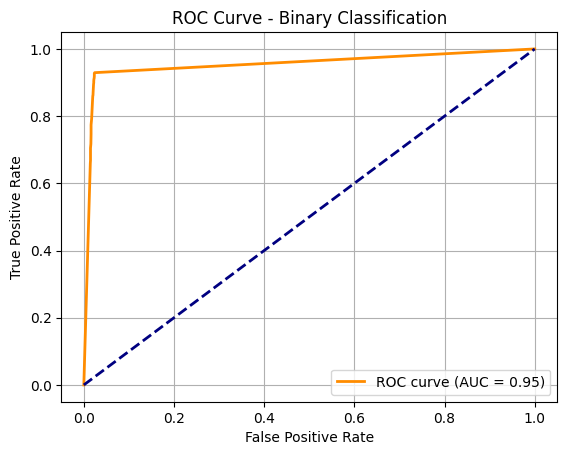

Average Precision (AP): 0.874


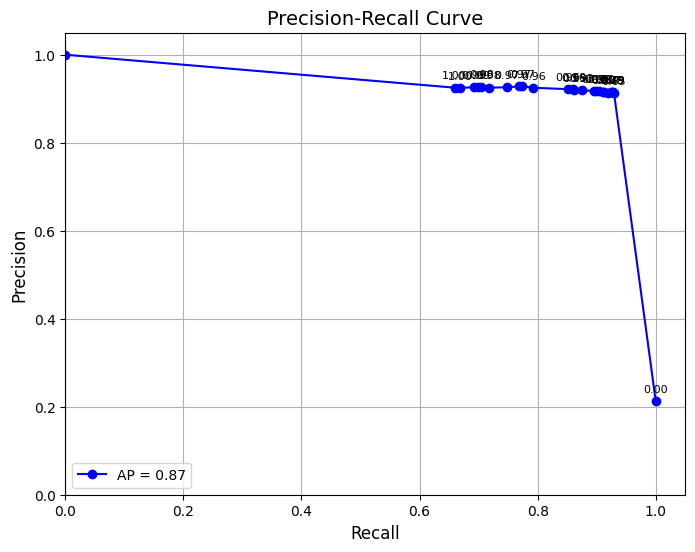

[[2302   61]
 [   6  631]]


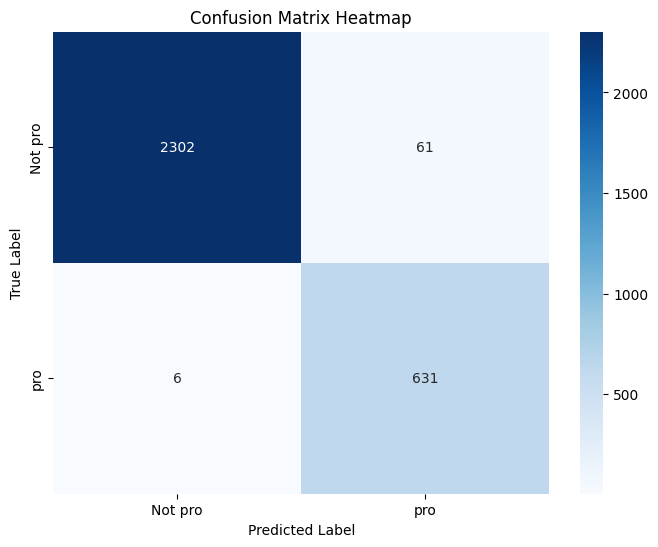

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      0.99      0.95       637

    accuracy                           0.98      3000
   macro avg       0.95      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



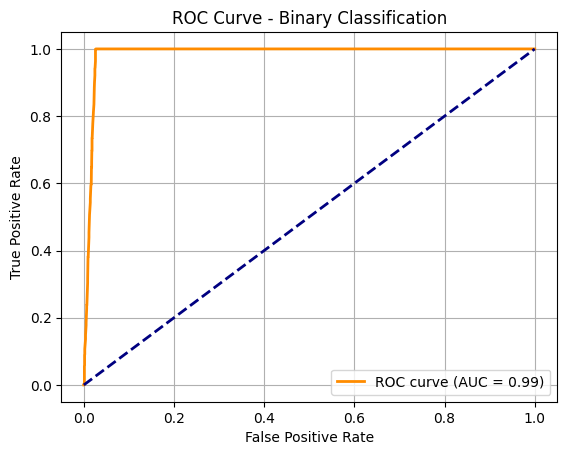

Average Precision (AP): 0.908


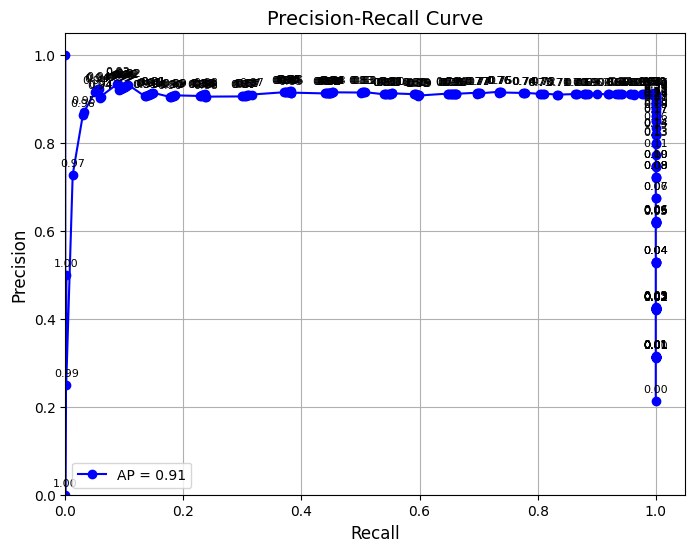

[[2299   64]
 [ 109  528]]


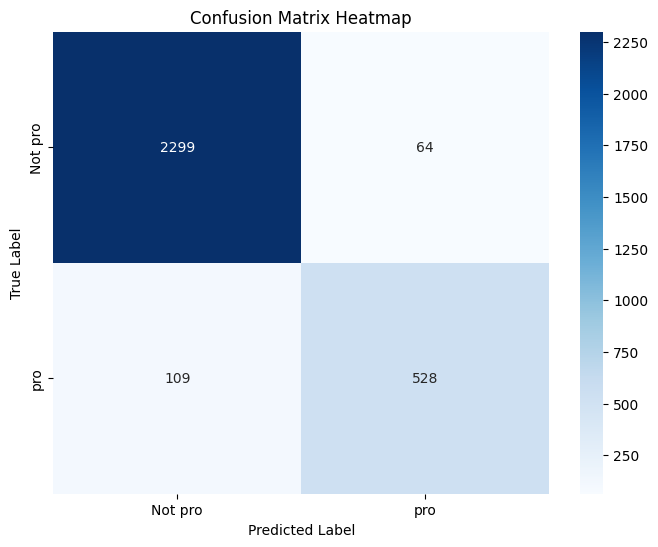

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2363
           1       0.89      0.83      0.86       637

    accuracy                           0.94      3000
   macro avg       0.92      0.90      0.91      3000
weighted avg       0.94      0.94      0.94      3000



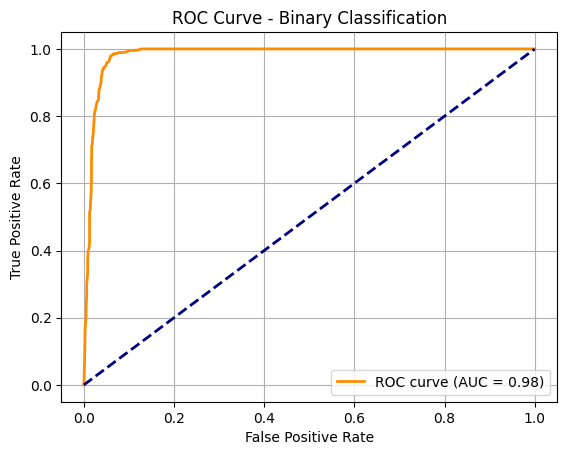

Average Precision (AP): 0.903


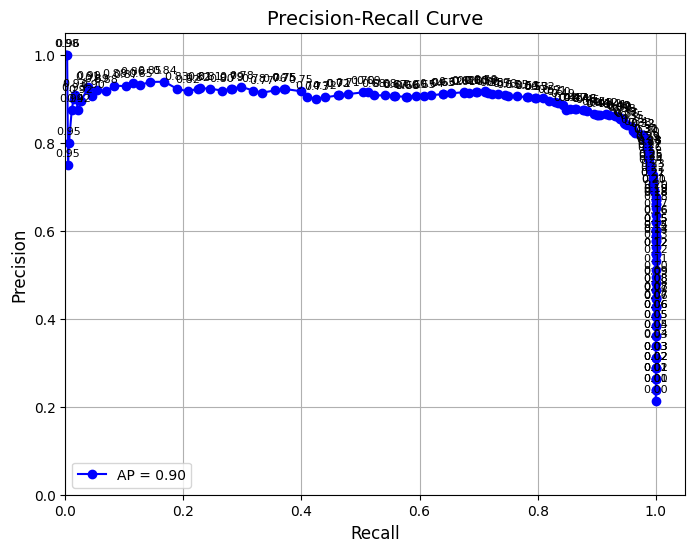

[[2302   61]
 [   2  635]]


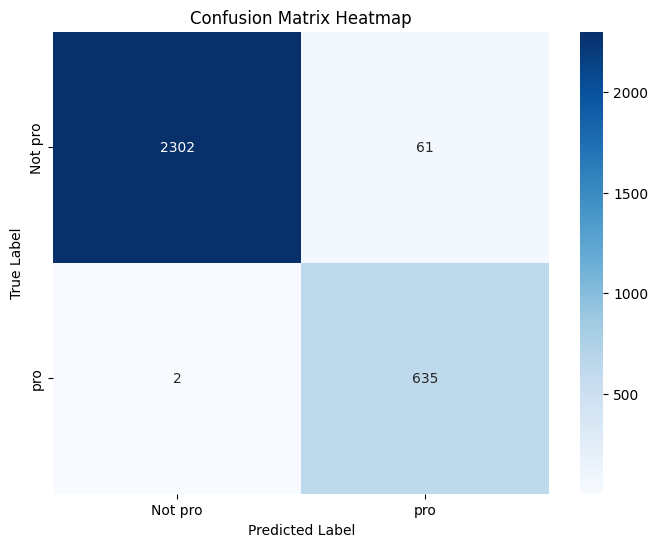

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      1.00      0.95       637

    accuracy                           0.98      3000
   macro avg       0.96      0.99      0.97      3000
weighted avg       0.98      0.98      0.98      3000



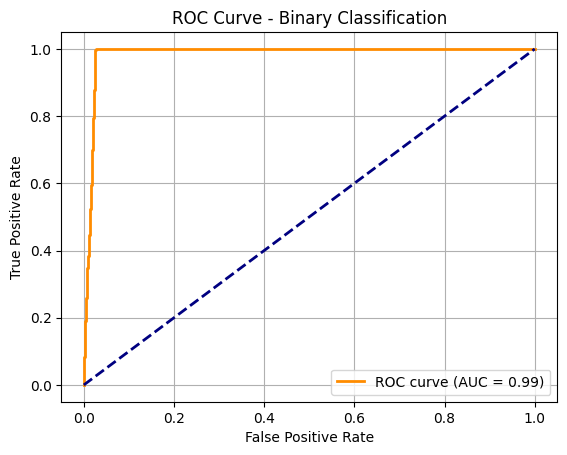

Average Precision (AP): 0.914


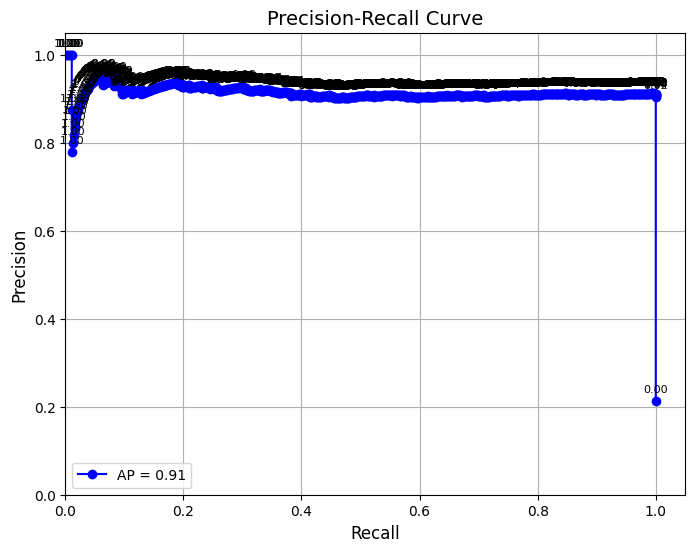

[[2293   70]
 [  90  547]]


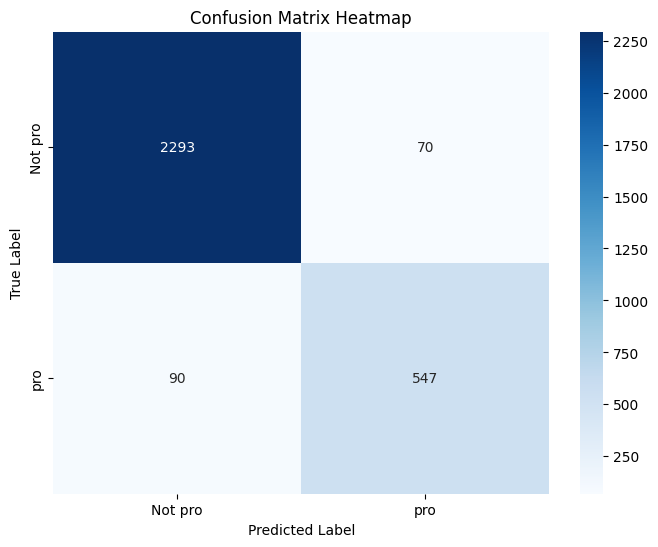

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2363
           1       0.89      0.86      0.87       637

    accuracy                           0.95      3000
   macro avg       0.92      0.91      0.92      3000
weighted avg       0.95      0.95      0.95      3000



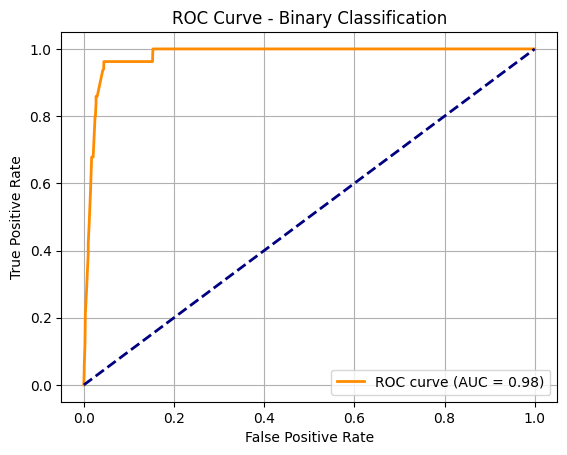

Average Precision (AP): 0.900


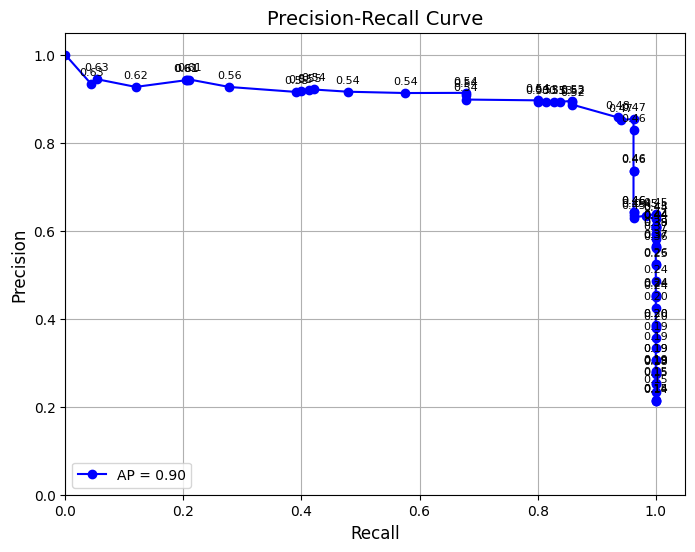

[[2301   62]
 [   0  637]]


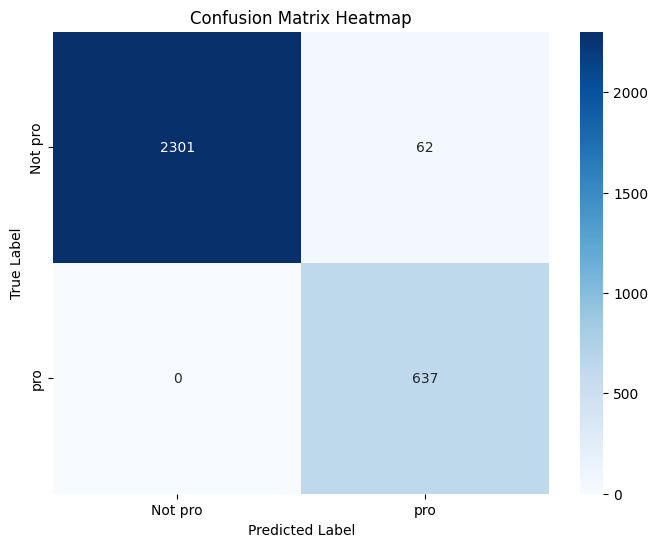

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      1.00      0.95       637

    accuracy                           0.98      3000
   macro avg       0.96      0.99      0.97      3000
weighted avg       0.98      0.98      0.98      3000



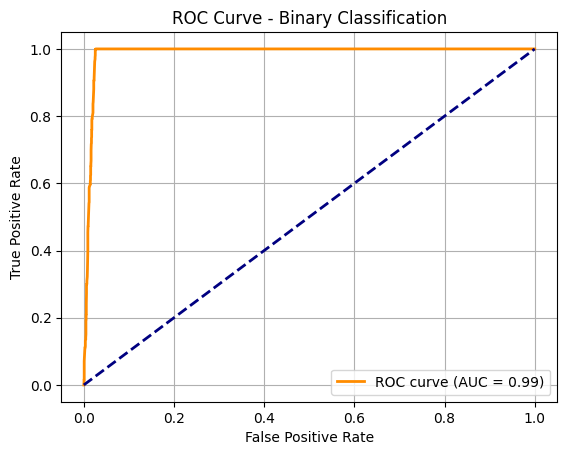

Average Precision (AP): 0.920


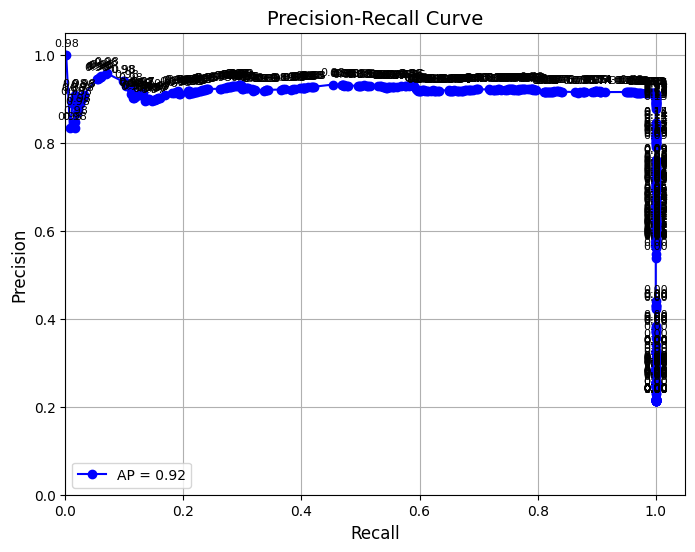

[[2302   61]
 [   6  631]]


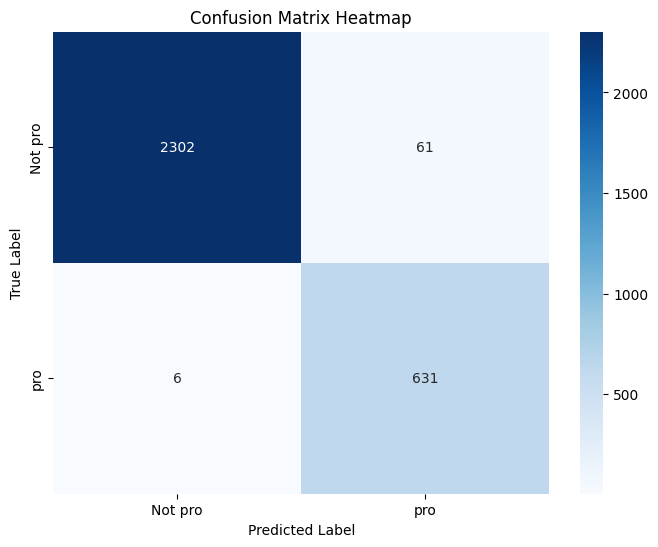

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      0.99      0.95       637

    accuracy                           0.98      3000
   macro avg       0.95      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



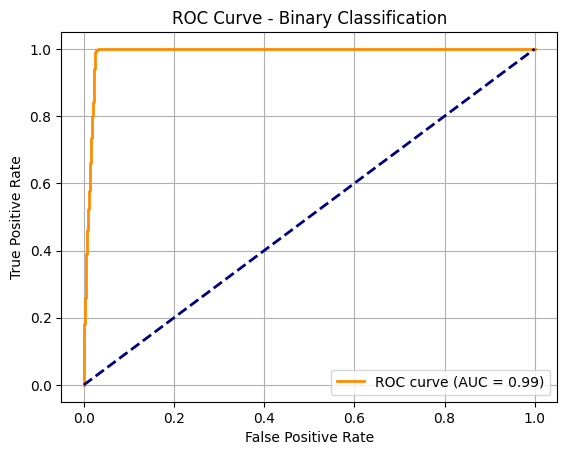

Average Precision (AP): 0.938


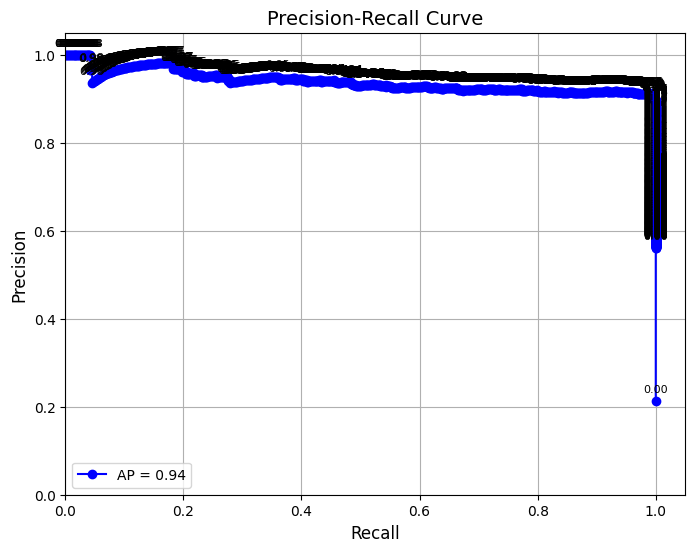

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[00:47:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




[[2302   61]
 [   2  635]]


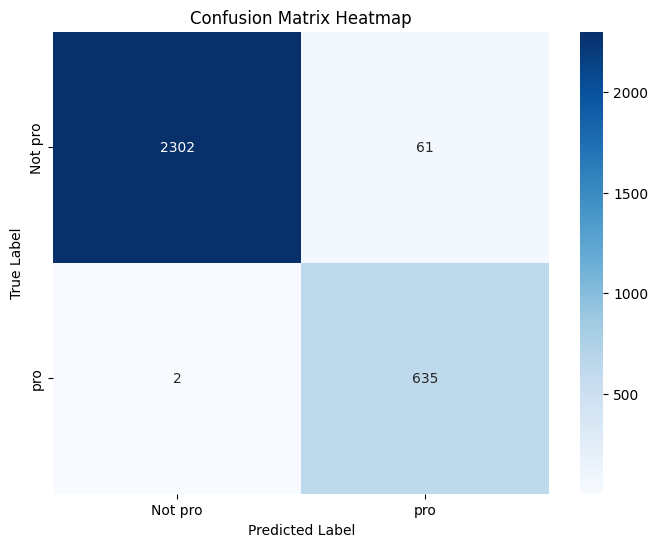

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      1.00      0.95       637

    accuracy                           0.98      3000
   macro avg       0.96      0.99      0.97      3000
weighted avg       0.98      0.98      0.98      3000



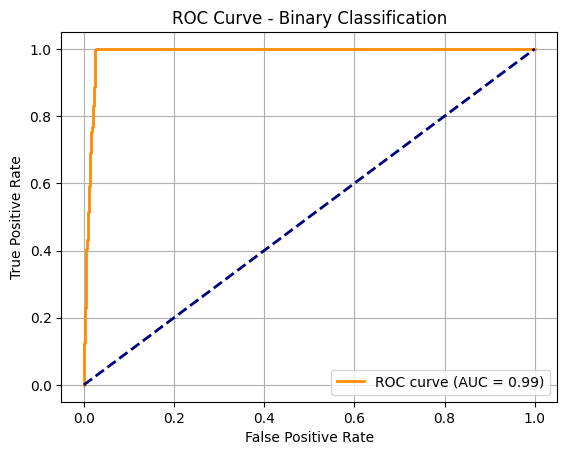

Average Precision (AP): 0.936


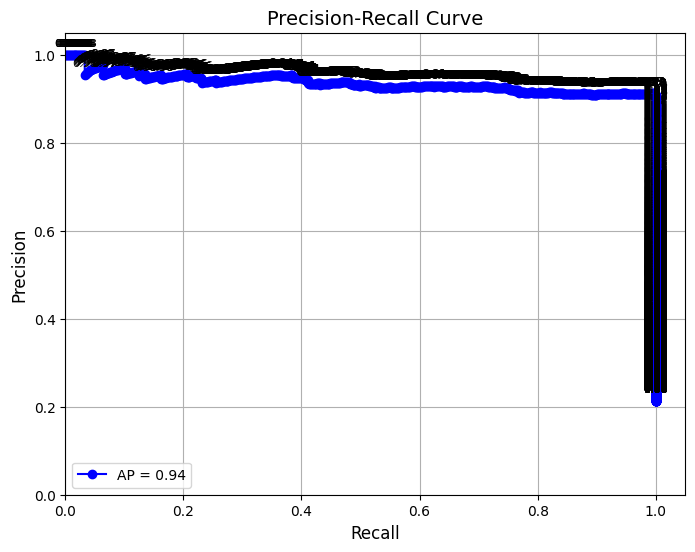

[[2302   61]
 [   2  635]]


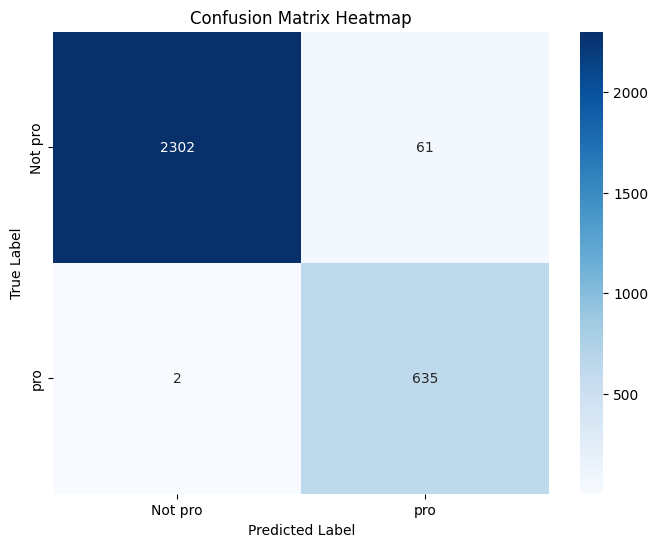

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      1.00      0.95       637

    accuracy                           0.98      3000
   macro avg       0.96      0.99      0.97      3000
weighted avg       0.98      0.98      0.98      3000



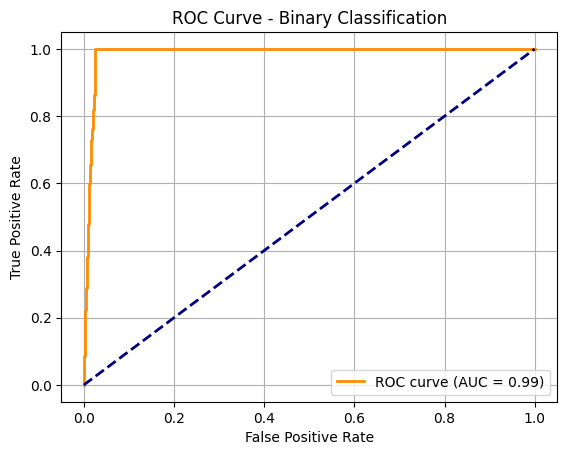

Average Precision (AP): 0.929


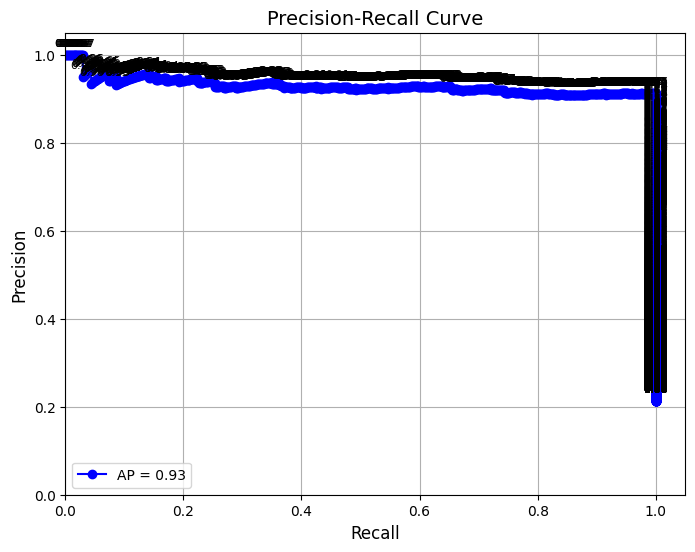

[LightGBM] [Info] Number of positive: 2549, number of negative: 9451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212417 -> initscore=-1.310419
[LightGBM] [Info] Start training from score -1.310419


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[[2303   60]
 [   5  632]]


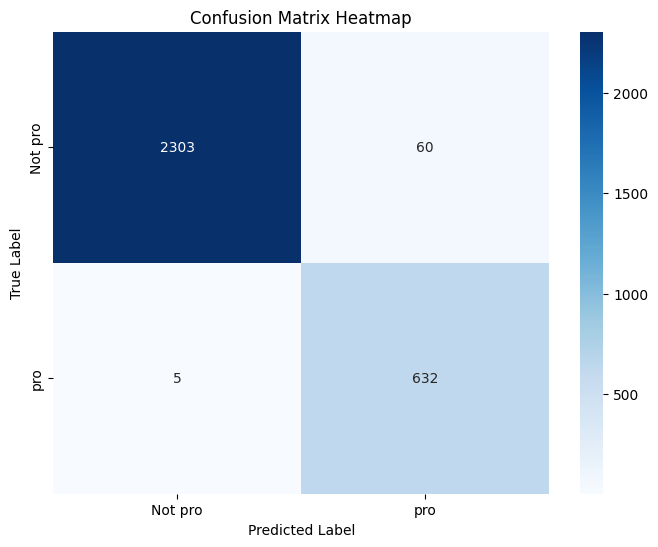

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2363
           1       0.91      0.99      0.95       637

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



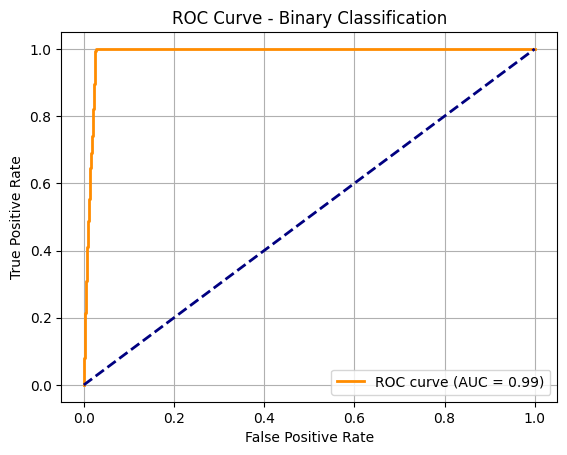

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



Average Precision (AP): 0.926


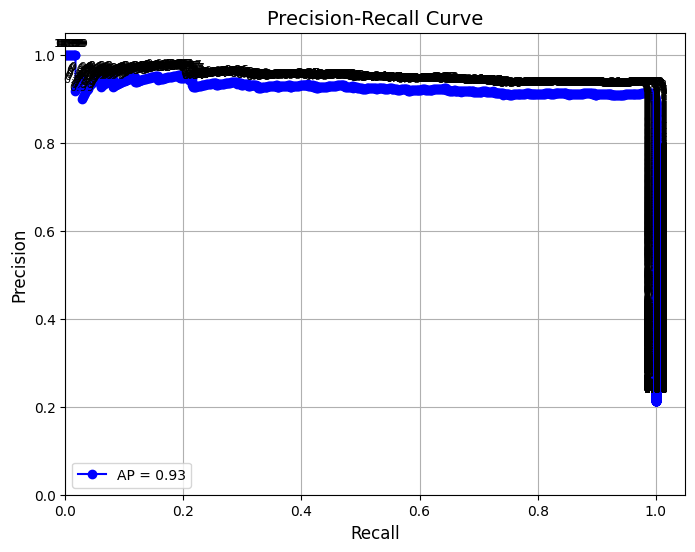

In [223]:
accuracy=[]
for model_name , model in models.items():
    model.fit(X_train_selected,y_train)
    y_pred_train = model.predict(X_train_selected)
    y_pred_test = model.predict(X_test_selected)

    Acc_Train = accuracy_score(y_train,y_pred_train)
    Acc_Test  =  accuracy_score(y_test,y_pred_test)


    Pre_Train = precision_score(y_train,y_pred_train)
    Pre_Test  =  precision_score(y_test,y_pred_test)

    Rec_Train = recall_score(y_train,y_pred_train)
    Rec_Test  =  recall_score(y_test,y_pred_test)

    F1_Train = f1_score(y_train,y_pred_train)
    F1_Test  =  f1_score(y_test,y_pred_test)

    accuracy.append([Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test])
    class_names=['Not pro','pro']
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    print(classification_report(y_test,y_pred_test))
    y_probs = model.predict_proba(X_test_selected)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Binary Classification')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


    y_pred_prob = model.predict_proba(X_test_selected)[:, 1]

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    ap = average_precision_score(y_test, y_pred_prob)
    print(f"Average Precision (AP): {ap:.3f}")

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='o', color='blue', label=f'AP = {ap:.2f}')

    for r, p, t in zip(recall, precision, list(thresholds) + [None]):
        if t is not None:
            plt.text(r, p + 0.02, f'{t:.2f}', fontsize=8, ha='center')

    plt.title('Precision-Recall Curve', fontsize=14)
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.show()

In [225]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train",
                               "Acc_Test","Pre_Test","Rec_Test","F1_Test"],index=models.keys())

Acc_Train  Pre_Train  Rec_Train  F1_Train  Acc_Test  \
logistic regression    0.890000   0.674822   0.930561  0.782322  0.887333   
GaussianNB             0.904000   0.748488   0.825422  0.785075  0.897000   
BernoulliNB            0.820667   0.641281   0.353472  0.455741  0.820333   
knn                    0.930083   0.887931   0.767752  0.823480  0.884000   
svm                    0.886000   0.661825   0.947430  0.779284  0.881000   
Decision Tree          0.990000   0.955039   1.000000  0.977003  0.966000   
Random Forest          0.999917   0.999608   1.000000  0.999804  0.977667   
ExtraTrees             1.000000   1.000000   1.000000  1.000000  0.942333   
Bagging                0.979583   0.912312   1.000000  0.954146  0.979000   
ada bosting            0.946000   0.885286   0.856807  0.870813  0.946667   
Gradient boosting      0.978667   0.909318   0.999215  0.952150  0.979333   
HistGradientBoosting   0.984167   0.930632   1.000000  0.964070  0.977667   
XGBoost                0.981000   0.917897   1.000000  0.957191  0.979000   
CatBoost               0.978250   0.908863   0.997646  0.951188  0.979000   
LightGBM               0.988333   0.947936   1.000000  0.973272  0.978333   

                      Pre_Test  Rec_Test   F1_Test  
logistic regression   0.668927  0.929356  0.777924  
GaussianNB            0.729050  0.819466  0.771619  
BernoulliNB           0.641618  0.348509  0.451679  
knn                   0.783890  0.626374  0.696335  
svm                   0.652174  0.941915  0.770713  
Decision Tree         0.912173  0.929356  0.920684  
Random Forest         0.911850  0.990581  0.949586  
ExtraTrees            0.891892  0.828885  0.859235  
Bagging               0.912356  0.996860  0.952738  
ada bosting           0.886548  0.858713  0.872408  
Gradient boosting     0.911302  1.000000  0.953593  
HistGradientBoosting  0.911850  0.990581  0.949586  
XGBoost               0.912356  0.996860  0.952738  
CatBoost              0.912356  0.996860  0.952738  
LightGBM              0.913295  0.992151  0.951091

## random search
##to find
##1-best parameters
##2-best score

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

#model = GradientBoostingClassifier()

#param_distributions = {
 #   'n_estimators': np.arange(10,61),
  #  'max_depth': np.arange(10,50)
#}

#random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=50, cv=5, scoring='accuracy')

#random_search.fit(X_train_selected,y_train)

#best_params = random_search.best_params_
#print("Best Parameters:", best_params)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
import numpy as np

model = CatBoostClassifier(
    verbose=0,
    random_state=42
)

param_distributions = {
    'iterations': np.arange(100, 150, 50),
    'depth': np.arange(4, 15),
    'learning_rate': np.linspace(0.01, 0.3, 30)
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

random_search.fit(X_train_selected, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)


In [228]:
print(f"Shape of X_train_selected: {X_train_selected.shape}")
print(f"Type of X_train_selected: {X_train_selected.dtype}")

Shape of X_train_selected: (12000, 15)
Type of X_train_selected: float64


In [ ]:
best_score = random_search.best_score_
print("Best Score:", best_score)

In [ ]:
pickle.dump(model,open("catBoostingClassifier.pkl","wb"))